# Package import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import random
import timeit
import sklearn
import sklearn.model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import string
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
random.seed(9001) # For Reproducibility of Results
%matplotlib inline

pd.set_option('display.max_rows', 300)

# Data Load

In [2]:
#NOMIS - CENSUS DATA - DIMENSIONS
population = pd.read_csv('postcodeSector/populationCount.csv', skiprows=8) # 8039*8
ethnicMinority = pd.read_csv('postcodeSector/Ethnic.csv', skiprows=8)  # 8039*96
ageStructure = pd.read_csv('postcodeSector/ageStructure.csv', skiprows=8) #8039*20
relationalSituation = pd.read_csv('postcodeSector/relational.csv', skiprows=8) #8039*8
livingArrangements = pd.read_csv('postcodeSector/livingArrangements.csv', skiprows=8) #8039*9
householdComposition = pd.read_csv('postcodeSector/householdComposition.csv', skiprows=8) #8039*23
notInEmploymentDependencies = pd.read_csv('postcodeSector/notInEmploymentDependencies.csv', skiprows=8) #8039*10
loneParentDependencies = pd.read_csv('postcodeSector/loneParentDependencies.csv', skiprows=8)#8039*13
ethnicGroup = pd.read_csv('postcodeSector/ethnicGroup.csv', skiprows=8) #8039*25
industry = pd.read_csv('postcodeSector/industry.csv', skiprows=8)#8039*26
tenure = pd.read_csv('postcodeSector/tenure.csv', skiprows=8) #8039*8
hoursWorked = pd.read_csv('postcodeSector/hoursWorked.csv', skiprows=8) #8039*6
dwelling = pd.read_csv('postcodeSector/dwelling.csv', skiprows=8) #8039*5
englishProf = pd.read_csv('postcodeSector/englishProf.csv', skiprows=8) #8039*7
centralHeating = pd.read_csv('postcodeSector/centralHeating.csv', skiprows=8) #8039*9
passportHeld = pd.read_csv('postcodeSector/passportHeld.csv', skiprows=7) #8039*73
birthCountry = pd.read_csv('postcodeSector/birthCountry.csv', skiprows=8) #8039*9
religion = pd.read_csv('postcodeSector/religion.csv', skiprows=8) #8063*12
generalHealth = pd.read_csv('postcodeSector/generalHealth.csv', skiprows=8) #8039*7
yearLastWorked = pd.read_csv('postcodeSector/yearLastWorked.csv', skiprows=8) #8039*13
householdSize = pd.read_csv('postcodeSector/householdSize.csv', skiprows=8) #8039*10
carOrVanAvailability = pd.read_csv('postcodeSector/carOrVanAvailability.csv', skiprows=8) #8039*7
distanceTravelledtoWork = pd.read_csv('postcodeSector/distanceTravelledtoWork.csv', skiprows=8) #8039*14
methodofTraveltoWork = pd.read_csv('postcodeSector/methodofTraveltoWork.csv', skiprows=8) #8039*14
ageofArrival = pd.read_csv('postcodeSector/ageofArrival.csv', skiprows=8) #8039*19
lengthofResidence = pd.read_csv('postcodeSector/lengthofResidence.csv', skiprows=8) #8039*7
occupationType = pd.read_csv('postcodeSector/occupation.csv', skiprows=8) #8039*11
mainLanguage = pd.read_csv('postcodeSector/mainLanguage.csv', skiprows=8) #8039*105
bedrooms = pd.read_csv('postcodeSector/bedrooms.csv', skiprows=8) #8039*8
longTermDisability = pd.read_csv('postcodeSector/longTermDisability.csv', skiprows=8) #8039*5
economicActivity = pd.read_csv('postcodeSector/economicActivity.csv', skiprows=8) #8039*17
positionInCommunalEstablishment = pd.read_csv('postcodeSector/positionInCommunalEstablishment.csv', skiprows=8) #8039*5
accomType = pd.read_csv('postcodeSector/accomType.csv', skiprows=8) #8039*13
secondAddress = pd.read_csv('postcodeSector/secondAddress.csv', skiprows=8) #8039*6
formerIndustry = pd.read_csv('postcodeSector/formerIndustry.csv', skiprows=8) #8039*11
formerOccupation = pd.read_csv('postcodeSector/formerOccupation.csv', skiprows=8) #8039*12


religion = religion.drop(religion.index[-24:]) # line added due to notes at bottom of CSV

qualification = pd.read_csv('postcodeSector/qualification.csv', skiprows=8) #8039*14   # AS A PROPORTION ONLY 


# Set up classification problem

In [3]:
qualification.drop(qualification.columns[[1,2,3,4,5,7,8,9,10,11,12]], axis=1, inplace=True)
qualification = qualification.rename(index=str, columns={"Highest level of qualification: Level 4 qualifications and above": "target"})

In [4]:
qualification.quantile(0.7) # Check to see where 70 percent quartile is to setup class imbalance

target    33.2
Name: 0.7, dtype: float64

In [5]:
# Assign a 1 or a zero as a output depending on whether proportion of people have, or don't have a higher education degree
qualification['classification'] = np.where(qualification['target']>=33.2, 1, 0) 

#Check
values = qualification.groupby('classification').count()
values['perc']= values['target']/values['target'].sum()
values

postcode sector  target     perc
classification                                  
0                          5620    5620  0.69944
1                          2415    2415  0.30056

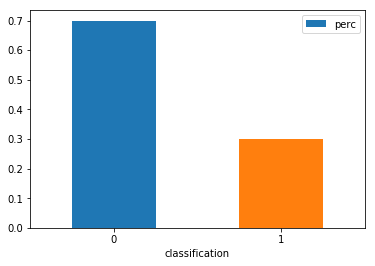

In [6]:
ax = values.plot.bar(y = 'perc',rot=0, )

# Combine datasets

In [7]:
###Merge different datasets
newDF = [population, ethnicMinority, ageStructure, relationalSituation, livingArrangements, householdComposition,notInEmploymentDependencies,loneParentDependencies,ethnicGroup,industry,tenure, hoursWorked,dwelling,englishProf,centralHeating,passportHeld,birthCountry,religion,generalHealth,yearLastWorked,householdSize,carOrVanAvailability,distanceTravelledtoWork,methodofTraveltoWork,ageofArrival,lengthofResidence,occupationType,mainLanguage,bedrooms,longTermDisability,economicActivity,positionInCommunalEstablishment,accomType,secondAddress,formerIndustry,formerOccupation,qualification]
newDF2 = pd.concat([i.set_index('postcode sector') for i in newDF],axis=1, join='outer')

In [8]:
#Check for dimensions
newDF2.shape

(8039, 735)

In [9]:
#drop rows without any information
newDF3 = newDF2.dropna()
newDF3.shape

(8035, 735)

In [10]:
#drop duplicate columns arising from merging...
newDF4 = newDF3.T.drop_duplicates().T

In [11]:
#remove spaces from variable names to allow access to columns
newDF4.columns = newDF4.columns.map(lambda x: x.replace(' ', '_'))

# Splitting data into Train, Test and Validation

In [12]:
featuresforTraining = newDF4.drop(['target','classification'], axis=1)

In [13]:
#Define function for splitting data
def validationTrainTestSplit(featuresforTraining, newDF4):#Splits data into 60-20-20 spilt 
    X_train1, X_test, y_train1, y_test = train_test_split(featuresforTraining, newDF4.classification, random_state=0, test_size=.2)
    X_train, X_validation, y_train,y_validation = train_test_split(X_train1, y_train1, random_state=0, test_size=.25)
    
    return X_train, X_test, X_validation, y_train, y_validation,y_test

In [14]:
#Execute function for splitting data
X_train, X_test, X_validation, y_train, y_validation,y_test = validationTrainTestSplit(featuresforTraining,newDF4)

In [15]:
#Check to see if 60-20-20 split correct
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(4821, 704)
(1607, 704)
(1607, 704)


In [16]:
y_train=y_train.astype('int')
y_test = y_test.astype('int')
y_validation = y_validation.astype('int')

# Feature Selection Stage

In [17]:
#Select about 70 features
start_time = timeit.default_timer()
select = RFE(LogisticRegression(),70)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)
elapsed = timeit.default_timer() - start_time
print(elapsed)

2324.007931383687


In [18]:
#check to see if reduction is correctly executed
print("The shape of X_train is:  ",  X_train.shape)
print("The shape of X_train_selected is:  ",  X_train_selected.shape)

The shape of X_train is:   (4821, 704)
The shape of X_train_selected is:   (4821, 70)


[False False False False False False False False False False  True False
 False False False False False False False False  True False False  True
  True False False False False False  True False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False  True False  True False
 False False False False False False False False False False False False
  True False False False False False False False False False False  True
 False False False  True False False False False Fa

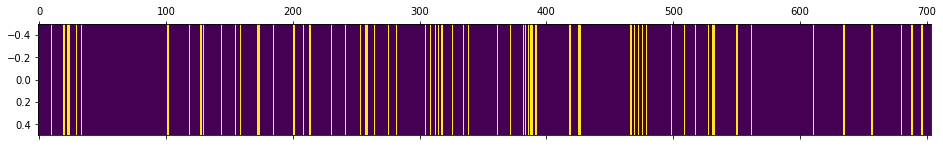

In [19]:
#Array creation of features selected, as well as graphical representation
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1),aspect='auto')

In [20]:
#Apply feature reduction to Validation and test set
X_validation_selected = select.transform(X_validation)
X_test_selected = select.transform(X_test)

# Selected Features

In [21]:
selectedVariables = X_train.columns[select.get_support()]


In [22]:
for i in selectedVariables:
    print(i)

Other_White
African
Arab
Any_other_ethnic_group
Australian/New_Zealander
Black_and_White
Age_5_to_7
All_usual_residents_aged_16+
Living_in_a_couple:_Cohabiting
Not_living_in_a_couple:_Married_or_in_a_registered_same-sex_civil_partnership
One_family_only:_Cohabiting_couple
Other_household_types:_Other
Dependent_children_in_household:_All_ages
Female_lone_parent:_In_part-time_employment
Female_lone_parent:_In_full-time_employment
Mixed/multiple_ethnic_groups:_Other_Mixed
C13-15_Manufacturing:_Textiles,_wearing_apparel_and_leather_and_related_products
C16,17_Manufacturing:_Wood,_paper_and_paper_products
F_Construction
K_Financial_and_insurance_activities
Part-time:_16_to_30_hours_worked
Main_language_is_not_English_(English_or_Welsh_in_Wales):_Cannot_speak_English_well
Europe:_Ireland
Europe:_Other_Europe:_EU_countries:_Member_countries_in_March_2001:_France
Europe:_Other_Europe:_EU_countries:_Member_countries_in_March_2001:_Germany
Europe:_Other_Europe:_EU_countries:_Accession_countries_

# Logistic Regression with Cross Validation

In [23]:
#Function for hyperparameter tuning
def hyperparameterTuneLogistic(i,j,X_train,y_train,X_test,y_test):
    print("        C =" + str(i) + "          Maximum Iterations =" + str(j))
#DEFINE MODEL
    logreg = LogisticRegression(C=i,max_iter=j,class_weight='balanced',random_state=123)
#TRAIN MODEL
    logreg.fit(X_train, y_train)
#Make Predictions
    y_pred = logreg.predict(X_test)
    
    
#PRINT METRICS
    print('CONFUSION MATRIX:   ')
    confusion_matrix2 = confusion_matrix(y_test, y_pred)
    print(confusion_matrix2)
    
    print('CLASSIFICATION REPORT:    ')
    print(classification_report(y_test, y_pred))

    print('ROC CURVE')
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    

    return

In [24]:
#HYPERPARAMETER TUNE
CValue = [0.001,0.0005,0.0001,0.01,0.5,0.1,0.5]
maxIterations = [50,100,150,200,250,300] 

        C =0.001          Maximum Iterations =50
CONFUSION MATRIX:   
[[1084   45]
 [  24  454]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1129
          1       0.91      0.95      0.93       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


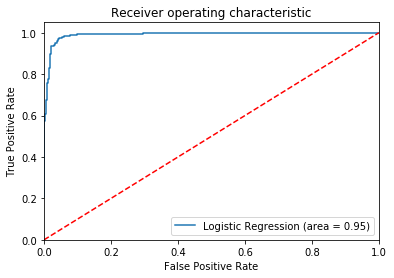

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =100
CONFUSION MATRIX:   
[[1084   45]
 [  24  454]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1129
          1       0.91      0.95      0.93       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


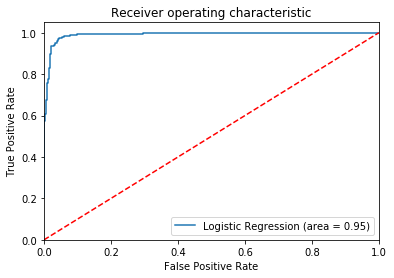

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =150
CONFUSION MATRIX:   
[[1084   45]
 [  24  454]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1129
          1       0.91      0.95      0.93       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


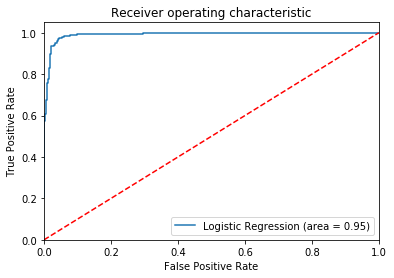

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =200
CONFUSION MATRIX:   
[[1084   45]
 [  24  454]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1129
          1       0.91      0.95      0.93       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


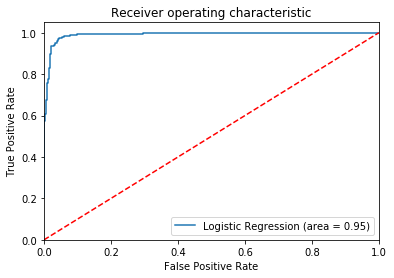

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =250
CONFUSION MATRIX:   
[[1084   45]
 [  24  454]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1129
          1       0.91      0.95      0.93       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


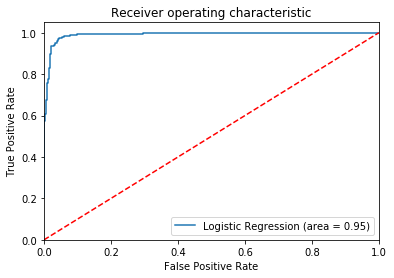

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =300
CONFUSION MATRIX:   
[[1084   45]
 [  24  454]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1129
          1       0.91      0.95      0.93       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


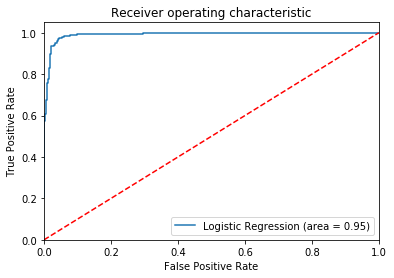

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =50
CONFUSION MATRIX:   
[[1088   41]
 [  22  456]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1129
          1       0.92      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


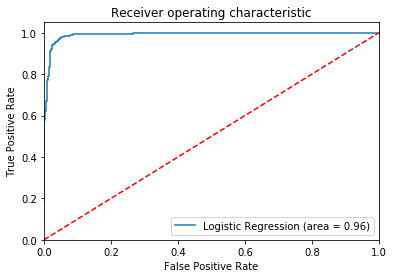

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =100
CONFUSION MATRIX:   
[[1088   41]
 [  22  456]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1129
          1       0.92      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


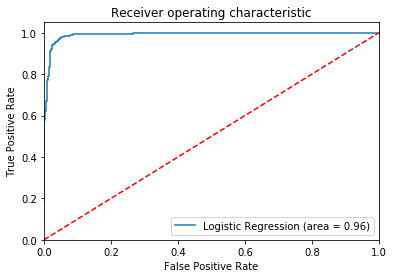

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =150
CONFUSION MATRIX:   
[[1088   41]
 [  22  456]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1129
          1       0.92      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


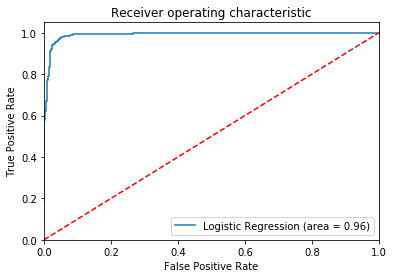

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =200
CONFUSION MATRIX:   
[[1088   41]
 [  22  456]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1129
          1       0.92      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


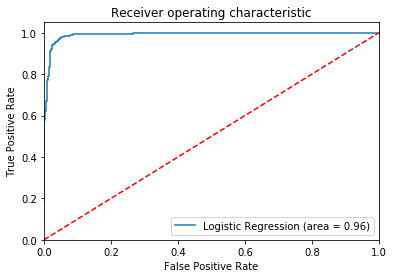

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =250
CONFUSION MATRIX:   
[[1088   41]
 [  22  456]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1129
          1       0.92      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


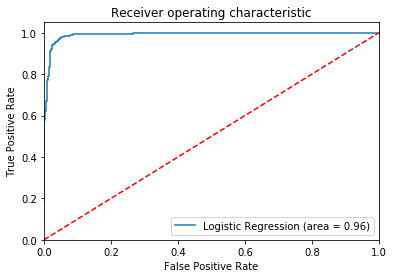

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =300
CONFUSION MATRIX:   
[[1088   41]
 [  22  456]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1129
          1       0.92      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


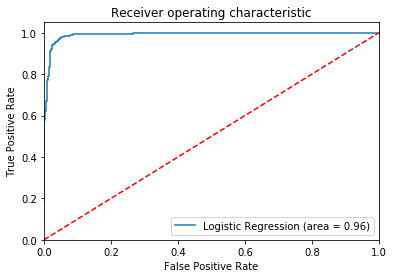

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =50
CONFUSION MATRIX:   
[[1087   42]
 [  18  460]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1129
          1       0.92      0.96      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


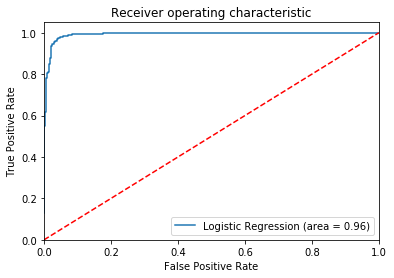

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =100
CONFUSION MATRIX:   
[[1087   42]
 [  18  460]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1129
          1       0.92      0.96      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


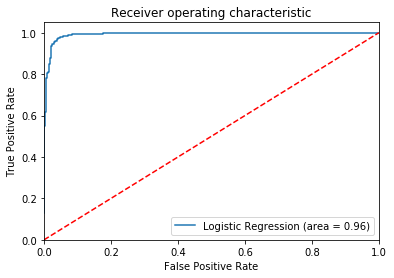

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =150
CONFUSION MATRIX:   
[[1087   42]
 [  18  460]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1129
          1       0.92      0.96      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


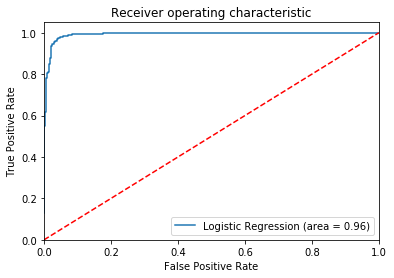

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =200
CONFUSION MATRIX:   
[[1087   42]
 [  18  460]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1129
          1       0.92      0.96      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


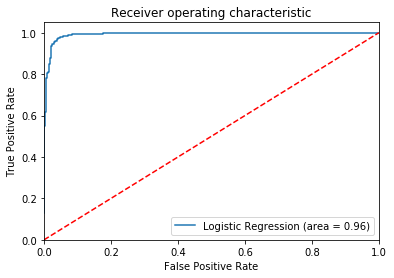

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =250
CONFUSION MATRIX:   
[[1087   42]
 [  18  460]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1129
          1       0.92      0.96      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


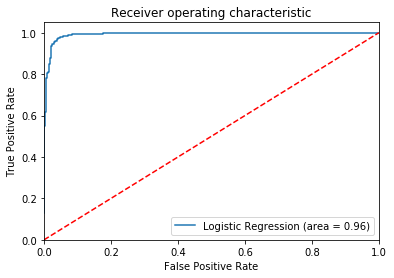

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =300
CONFUSION MATRIX:   
[[1087   42]
 [  18  460]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1129
          1       0.92      0.96      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


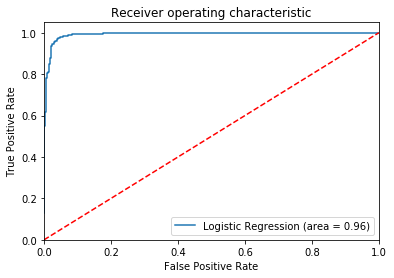

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =50
CONFUSION MATRIX:   
[[1087   42]
 [  32  446]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.97      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


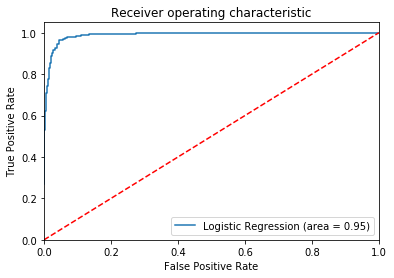

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =100
CONFUSION MATRIX:   
[[1087   42]
 [  32  446]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.97      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


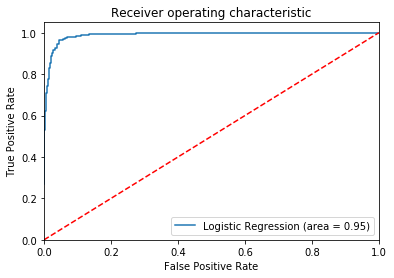

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =150
CONFUSION MATRIX:   
[[1087   42]
 [  32  446]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.97      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


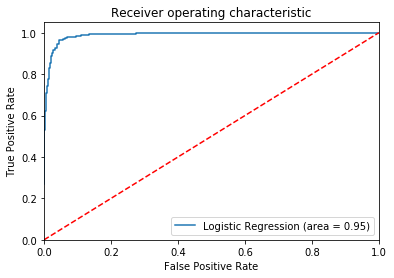

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =200
CONFUSION MATRIX:   
[[1087   42]
 [  32  446]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.97      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


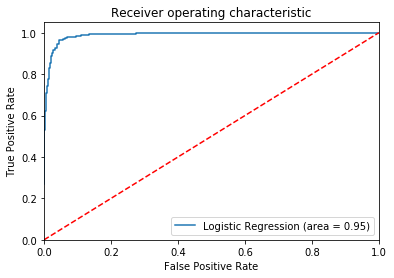

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =250
CONFUSION MATRIX:   
[[1087   42]
 [  32  446]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.97      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


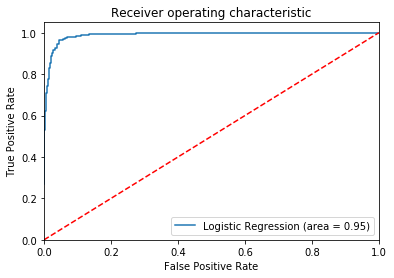

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =300
CONFUSION MATRIX:   
[[1087   42]
 [  32  446]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.97      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


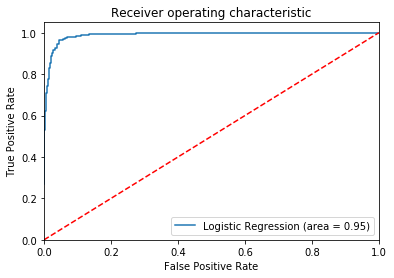

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =50
CONFUSION MATRIX:   
[[1084   45]
 [  34  444]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.96      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


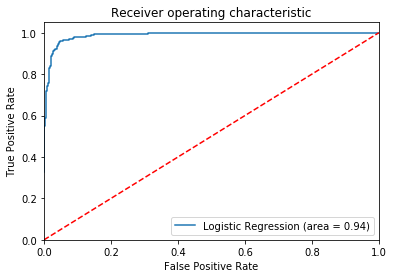

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =100
CONFUSION MATRIX:   
[[1084   45]
 [  34  444]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.96      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


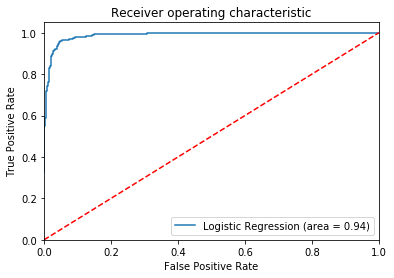

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =150
CONFUSION MATRIX:   
[[1084   45]
 [  34  444]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.96      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


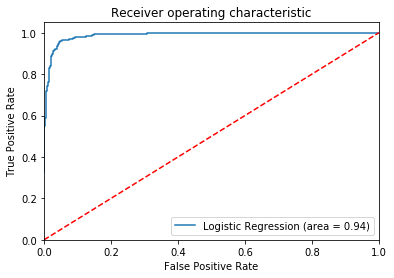

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =200
CONFUSION MATRIX:   
[[1084   45]
 [  34  444]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.96      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


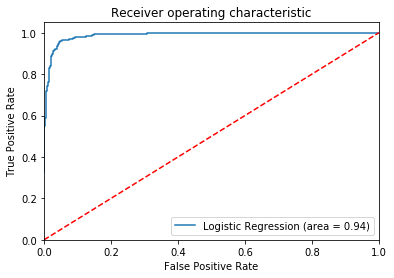

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =250
CONFUSION MATRIX:   
[[1084   45]
 [  34  444]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.96      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


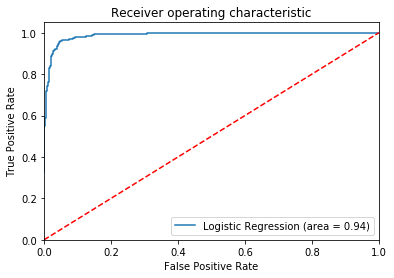

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =300
CONFUSION MATRIX:   
[[1084   45]
 [  34  444]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.96      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


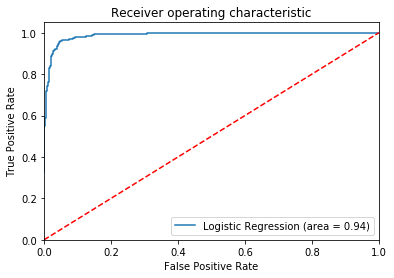

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =50
CONFUSION MATRIX:   
[[1086   43]
 [  32  446]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.97      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


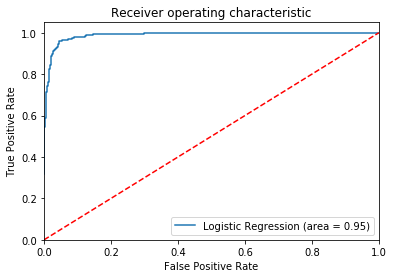

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =100
CONFUSION MATRIX:   
[[1086   43]
 [  32  446]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.97      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


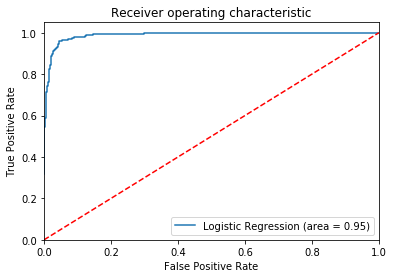

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =150
CONFUSION MATRIX:   
[[1086   43]
 [  32  446]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.97      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


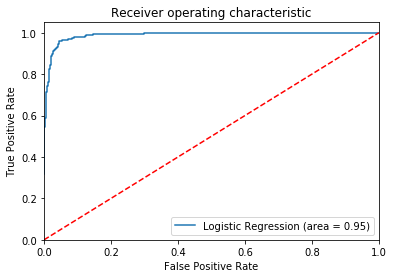

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =200
CONFUSION MATRIX:   
[[1086   43]
 [  32  446]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.97      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


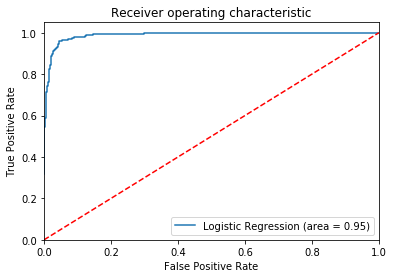

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =250
CONFUSION MATRIX:   
[[1086   43]
 [  32  446]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.97      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


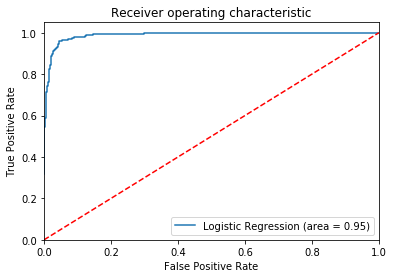

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =300
CONFUSION MATRIX:   
[[1086   43]
 [  32  446]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.97      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


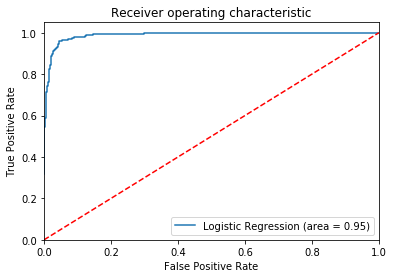

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =50
CONFUSION MATRIX:   
[[1084   45]
 [  34  444]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.96      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


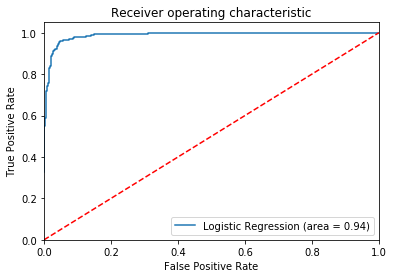

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =100
CONFUSION MATRIX:   
[[1084   45]
 [  34  444]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.96      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


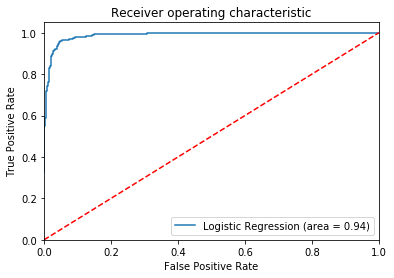

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =150
CONFUSION MATRIX:   
[[1084   45]
 [  34  444]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.96      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


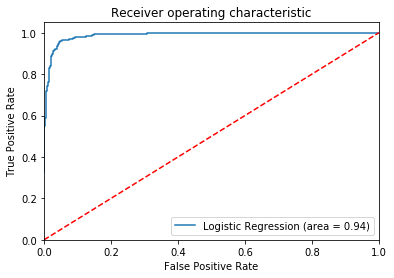

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =200
CONFUSION MATRIX:   
[[1084   45]
 [  34  444]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.96      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


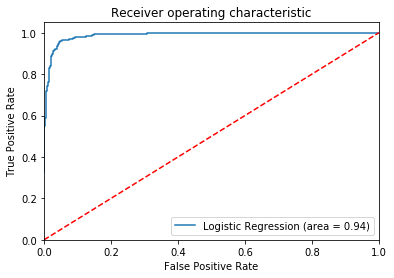

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =250
CONFUSION MATRIX:   
[[1084   45]
 [  34  444]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.96      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


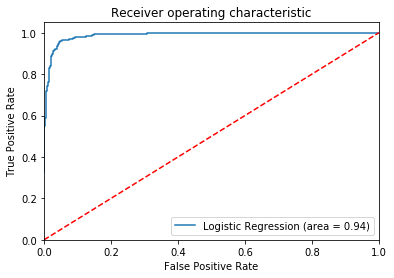

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =300
CONFUSION MATRIX:   
[[1084   45]
 [  34  444]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.96      1129
          1       0.91      0.93      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


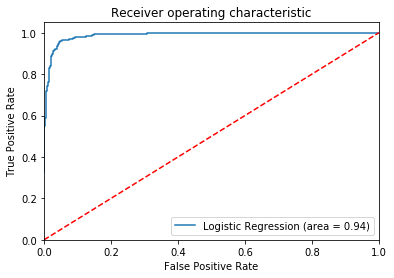

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
20.005185291804082


In [25]:
#RUN LOOP OF ALL PARAMETERS
start_time = timeit.default_timer()
for i in CValue:
    for j in maxIterations:
        hyperparameterTuneLogistic(i,j,X_train_selected, y_train, X_validation_selected, y_validation)
elapsed = timeit.default_timer() - start_time
print(elapsed)

### Logistic Regression

###### OPTIMAL PARAMETERS
###### C = 0.001    max_iter = 300
###### Execution time (20.005 seconds)


# Random Forest with Cross Validation

In [26]:
#HYPER PARAMETER TUNE
Estimators = [10,30,50,80,100,]
maxFeatures = ["auto","sqrt","log2", None ]
maxDepth = [1,10,50,100,150,None]

In [27]:
def hyperparameterTuneRandomForest(i,j,k,X_train,y_train,X_test,y_test):
    print("  Estimators =" + str(i) + "          Maximum Features =" + str(j) + "         Maximum Depth =" + str(k) )
# initiate model
    RandomForest = RandomForestClassifier(n_estimators=i, max_features = j, max_depth = k ,random_state=123, class_weight = 'balanced_subsample')

# train model
    RandomForest.fit(X_train, y_train)

#make predictions
    
    y_pred = RandomForest.predict(X_test)

#print metrics
    print('CONFUSION MATRIX:   ')
    confusion_matrix2 = confusion_matrix(y_test, y_pred)
    print(confusion_matrix2)
    
    print('CLASSIFICATION REPORT:    ')
    print(classification_report(y_test, y_pred))

    print('ROC CURVE')
    logit_roc_auc = roc_auc_score(y_test, RandomForest.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, RandomForest.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    return

  Estimators =10          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[845 284]
 [101 377]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.75      0.81      1129
          1       0.57      0.79      0.66       478

avg / total       0.80      0.76      0.77      1607

ROC CURVE


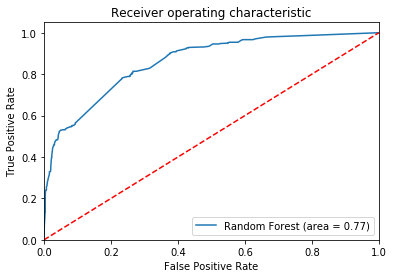

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1058   71]
 [  83  395]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.94      0.93      1129
          1       0.85      0.83      0.84       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


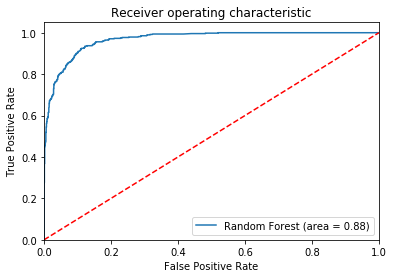

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[1096   33]
 [ 122  356]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.92      0.74      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


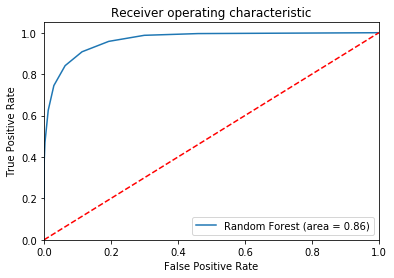

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[1096   33]
 [ 122  356]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.92      0.74      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


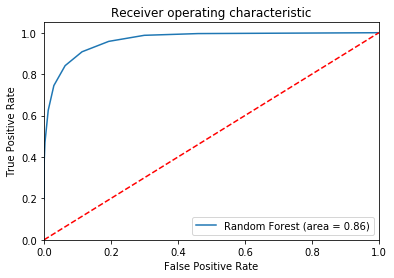

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[1096   33]
 [ 122  356]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.92      0.74      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


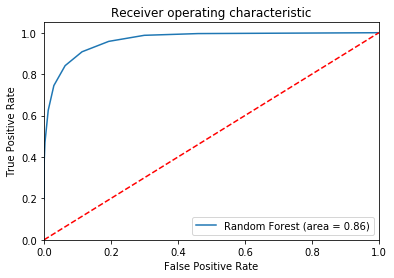

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[1096   33]
 [ 122  356]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.92      0.74      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


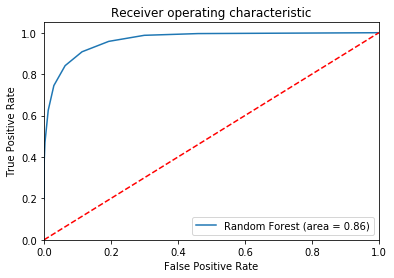

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[845 284]
 [101 377]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.75      0.81      1129
          1       0.57      0.79      0.66       478

avg / total       0.80      0.76      0.77      1607

ROC CURVE


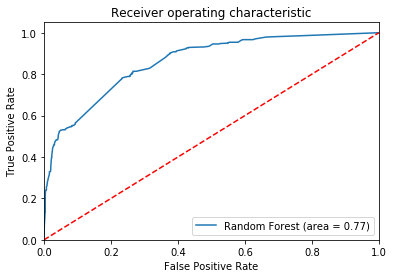

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[1058   71]
 [  83  395]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.94      0.93      1129
          1       0.85      0.83      0.84       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


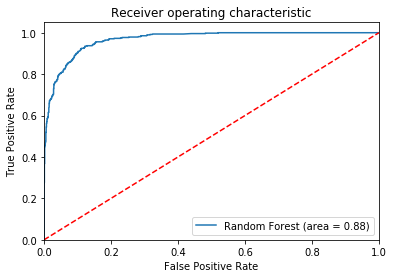

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[1096   33]
 [ 122  356]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.92      0.74      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


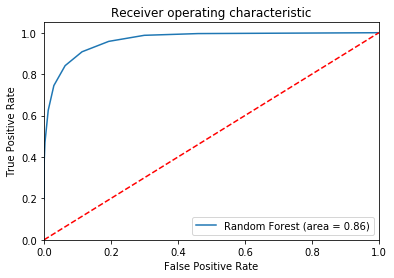

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[1096   33]
 [ 122  356]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.92      0.74      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


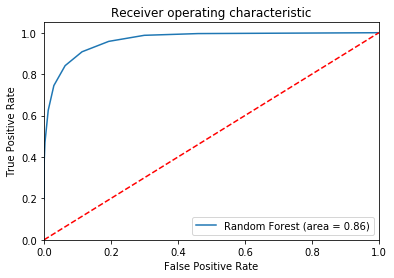

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[1096   33]
 [ 122  356]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.92      0.74      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


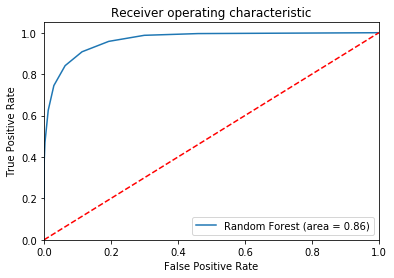

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[1096   33]
 [ 122  356]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.92      0.74      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


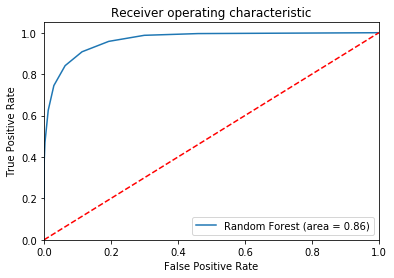

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[763 366]
 [ 62 416]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.68      0.78      1129
          1       0.53      0.87      0.66       478

avg / total       0.81      0.73      0.75      1607

ROC CURVE


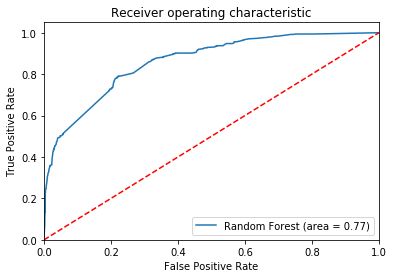

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[1048   81]
 [  83  395]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.93      0.93      1129
          1       0.83      0.83      0.83       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


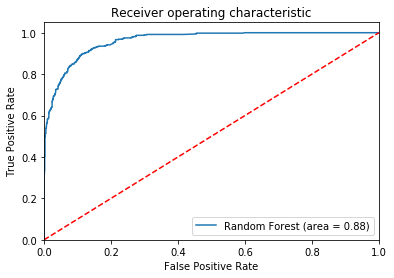

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[1089   40]
 [ 141  337]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.96      0.92      1129
          1       0.89      0.71      0.79       478

avg / total       0.89      0.89      0.88      1607

ROC CURVE


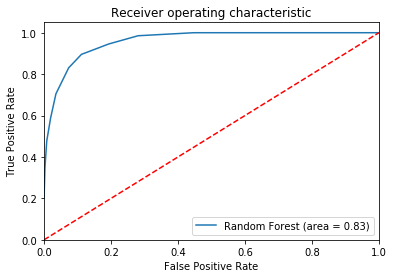

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[1089   40]
 [ 141  337]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.96      0.92      1129
          1       0.89      0.71      0.79       478

avg / total       0.89      0.89      0.88      1607

ROC CURVE


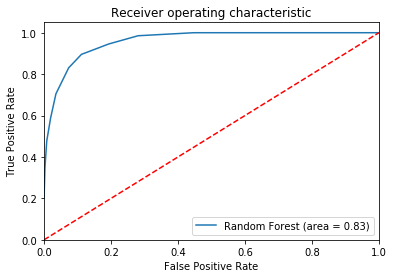

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[1089   40]
 [ 141  337]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.96      0.92      1129
          1       0.89      0.71      0.79       478

avg / total       0.89      0.89      0.88      1607

ROC CURVE


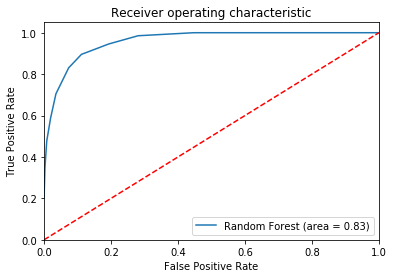

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[1089   40]
 [ 141  337]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.96      0.92      1129
          1       0.89      0.71      0.79       478

avg / total       0.89      0.89      0.88      1607

ROC CURVE


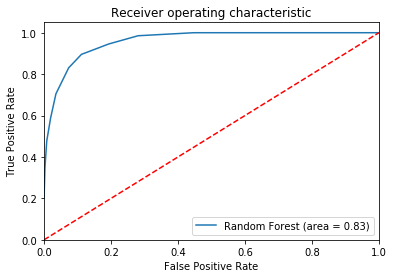

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[905 224]
 [176 302]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.84      0.80      0.82      1129
          1       0.57      0.63      0.60       478

avg / total       0.76      0.75      0.75      1607

ROC CURVE


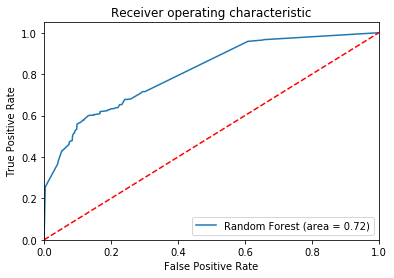

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1067   62]
 [  69  409]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.95      0.94      1129
          1       0.87      0.86      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


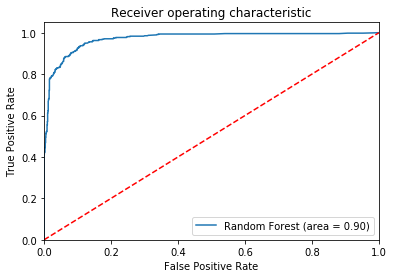

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[1086   43]
 [  93  385]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.90      0.81      0.85       478

avg / total       0.91      0.92      0.91      1607

ROC CURVE


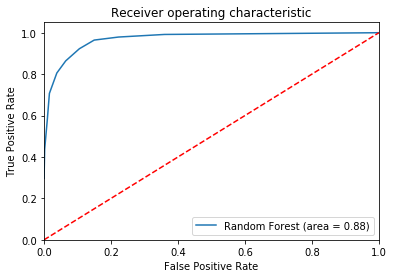

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[1086   43]
 [  93  385]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.90      0.81      0.85       478

avg / total       0.91      0.92      0.91      1607

ROC CURVE


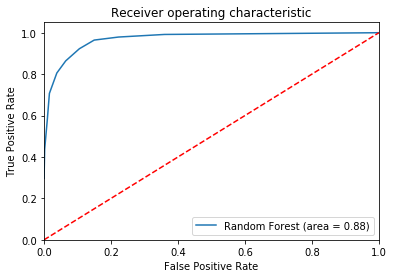

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[1086   43]
 [  93  385]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.90      0.81      0.85       478

avg / total       0.91      0.92      0.91      1607

ROC CURVE


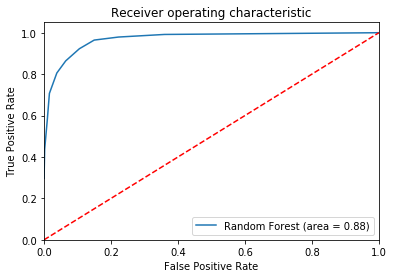

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1086   43]
 [  93  385]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.90      0.81      0.85       478

avg / total       0.91      0.92      0.91      1607

ROC CURVE


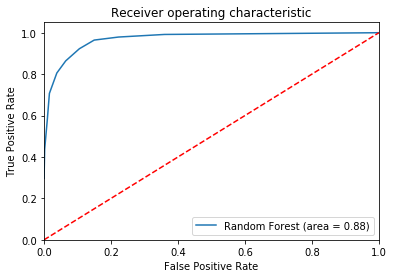

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[962 167]
 [178 300]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.84      0.85      0.85      1129
          1       0.64      0.63      0.63       478

avg / total       0.78      0.79      0.78      1607

ROC CURVE


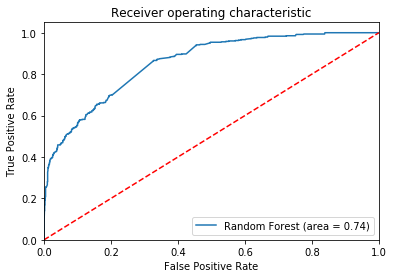

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1067   62]
 [  64  414]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.95      0.94      1129
          1       0.87      0.87      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


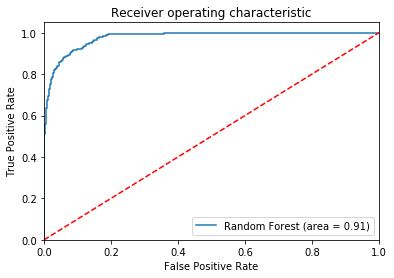

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[1092   37]
 [ 102  376]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.79      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


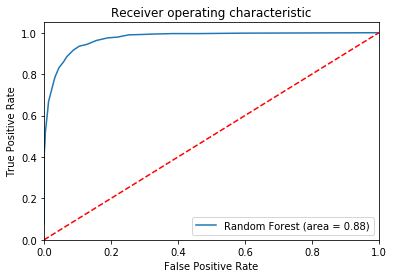

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[1092   37]
 [ 102  376]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.79      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


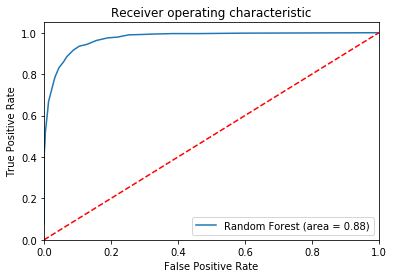

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[1092   37]
 [ 102  376]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.79      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


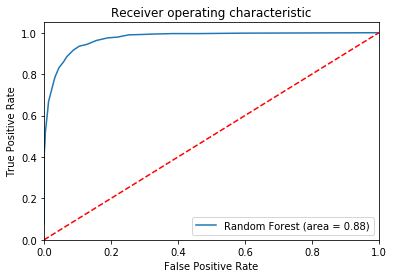

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[1092   37]
 [ 102  376]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.79      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


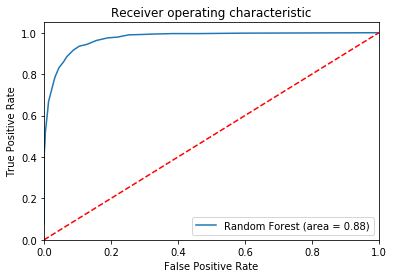

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[962 167]
 [178 300]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.84      0.85      0.85      1129
          1       0.64      0.63      0.63       478

avg / total       0.78      0.79      0.78      1607

ROC CURVE


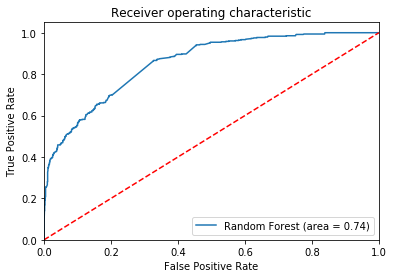

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[1067   62]
 [  64  414]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.95      0.94      1129
          1       0.87      0.87      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


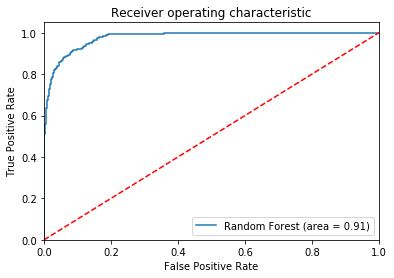

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[1092   37]
 [ 102  376]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.79      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


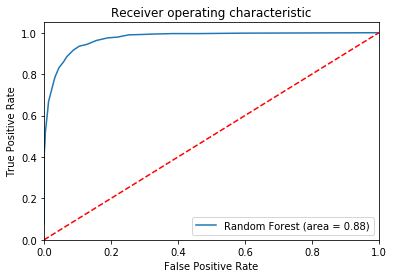

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[1092   37]
 [ 102  376]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.79      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


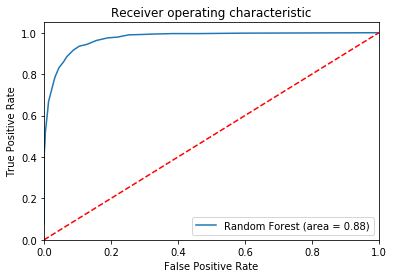

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[1092   37]
 [ 102  376]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.79      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


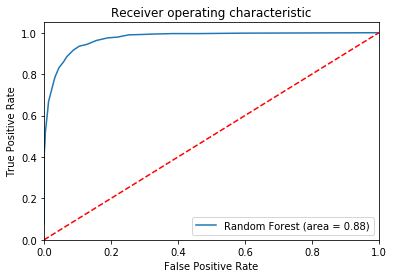

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[1092   37]
 [ 102  376]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.79      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


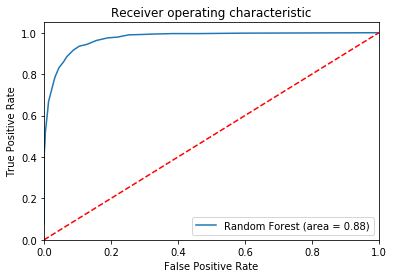

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[966 163]
 [175 303]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.86      0.85      1129
          1       0.65      0.63      0.64       478

avg / total       0.79      0.79      0.79      1607

ROC CURVE


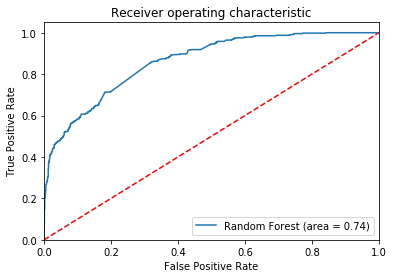

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[1061   68]
 [  64  414]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.94      0.94      1129
          1       0.86      0.87      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


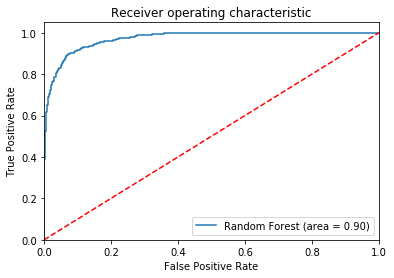

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[1086   43]
 [ 115  363]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1129
          1       0.89      0.76      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


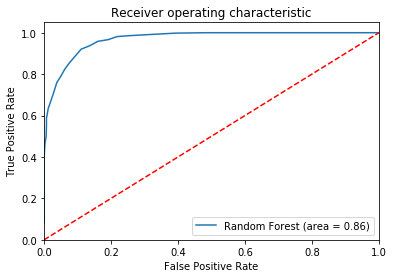

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[1086   43]
 [ 115  363]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1129
          1       0.89      0.76      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


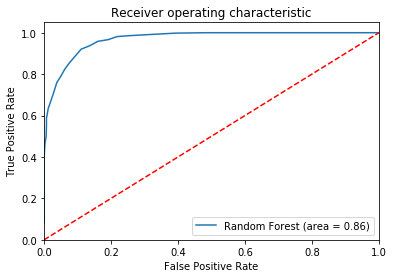

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[1086   43]
 [ 115  363]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1129
          1       0.89      0.76      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


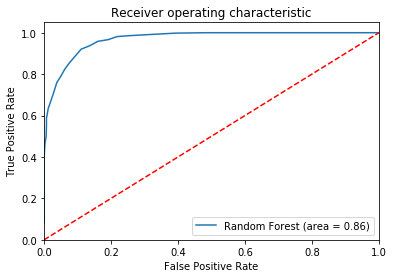

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[1086   43]
 [ 115  363]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1129
          1       0.89      0.76      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


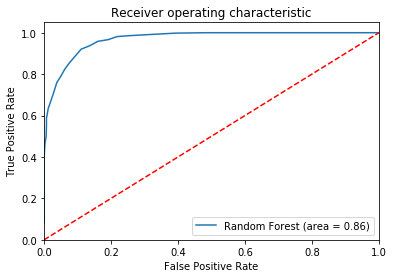

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[971 158]
 [211 267]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.82      0.86      0.84      1129
          1       0.63      0.56      0.59       478

avg / total       0.76      0.77      0.77      1607

ROC CURVE


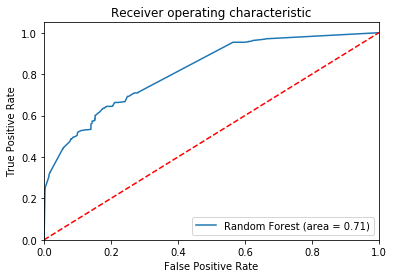

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1060   69]
 [  60  418]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.94      0.94      1129
          1       0.86      0.87      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


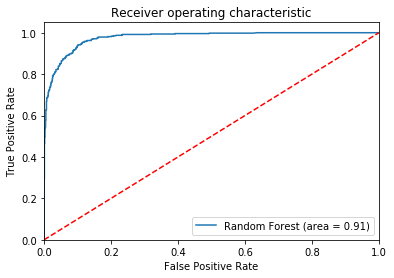

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[1085   44]
 [  77  401]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1129
          1       0.90      0.84      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


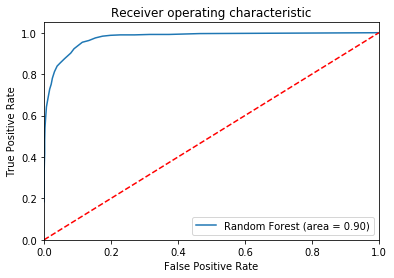

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[1085   44]
 [  77  401]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1129
          1       0.90      0.84      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


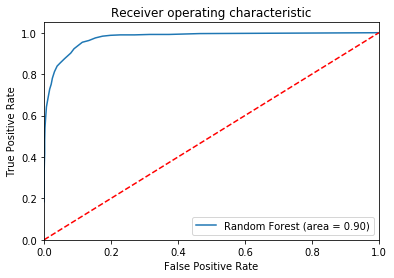

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[1085   44]
 [  77  401]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1129
          1       0.90      0.84      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


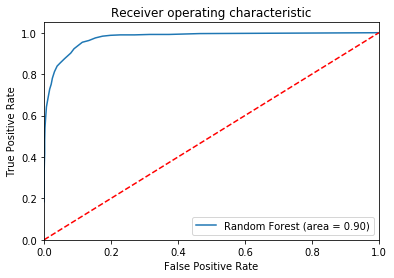

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1085   44]
 [  77  401]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1129
          1       0.90      0.84      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


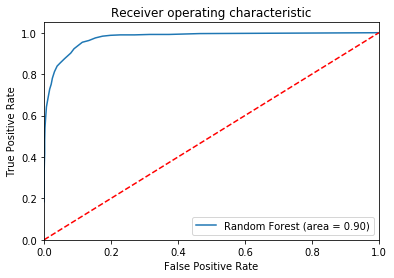

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[950 179]
 [170 308]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.84      0.84      1129
          1       0.63      0.64      0.64       478

avg / total       0.78      0.78      0.78      1607

ROC CURVE


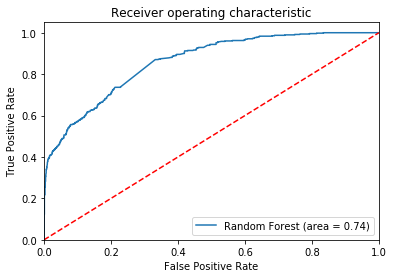

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1074   55]
 [  57  421]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1129
          1       0.88      0.88      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


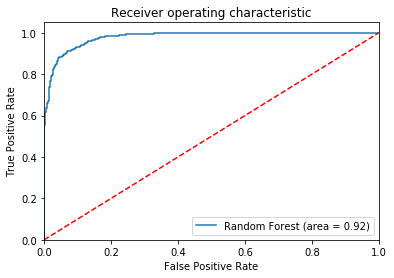

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[1092   37]
 [  99  379]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.91      0.79      0.85       478

avg / total       0.92      0.92      0.91      1607

ROC CURVE


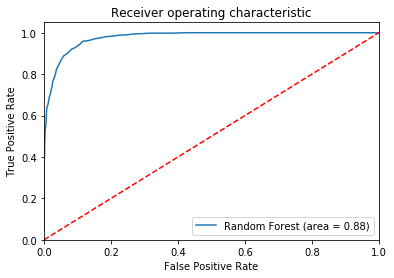

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[1092   37]
 [  99  379]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.91      0.79      0.85       478

avg / total       0.92      0.92      0.91      1607

ROC CURVE


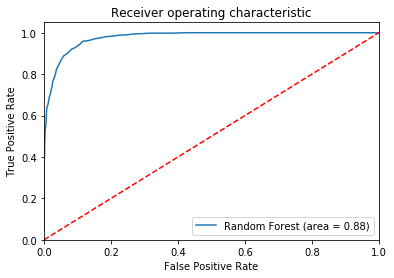

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[1092   37]
 [  99  379]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.91      0.79      0.85       478

avg / total       0.92      0.92      0.91      1607

ROC CURVE


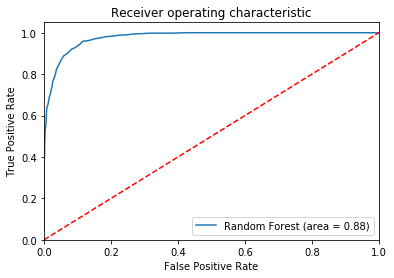

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[1092   37]
 [  99  379]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.91      0.79      0.85       478

avg / total       0.92      0.92      0.91      1607

ROC CURVE


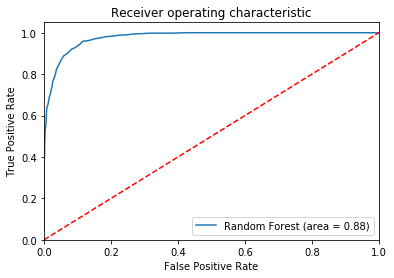

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[950 179]
 [170 308]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.84      0.84      1129
          1       0.63      0.64      0.64       478

avg / total       0.78      0.78      0.78      1607

ROC CURVE


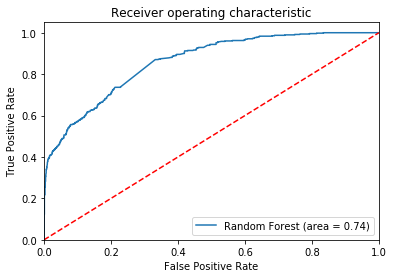

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[1074   55]
 [  57  421]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1129
          1       0.88      0.88      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


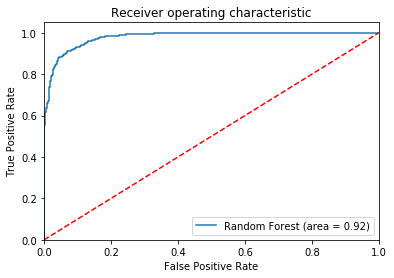

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[1092   37]
 [  99  379]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.91      0.79      0.85       478

avg / total       0.92      0.92      0.91      1607

ROC CURVE


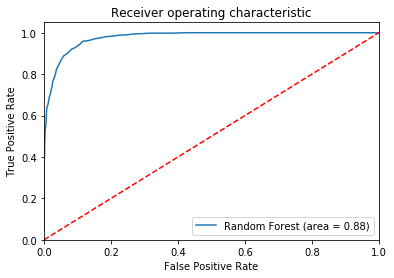

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[1092   37]
 [  99  379]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.91      0.79      0.85       478

avg / total       0.92      0.92      0.91      1607

ROC CURVE


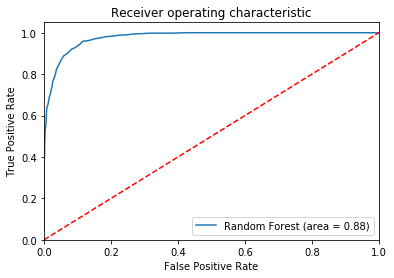

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[1092   37]
 [  99  379]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.91      0.79      0.85       478

avg / total       0.92      0.92      0.91      1607

ROC CURVE


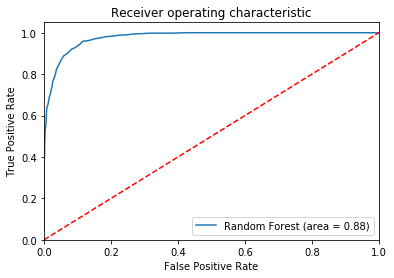

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[1092   37]
 [  99  379]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.91      0.79      0.85       478

avg / total       0.92      0.92      0.91      1607

ROC CURVE


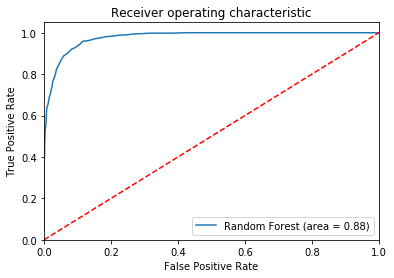

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[963 166]
 [172 306]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85      1129
          1       0.65      0.64      0.64       478

avg / total       0.79      0.79      0.79      1607

ROC CURVE


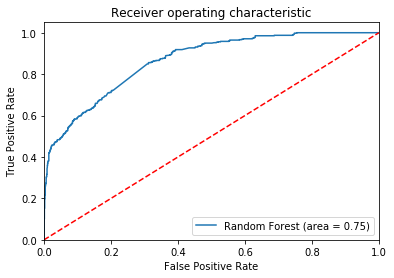

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[1065   64]
 [  57  421]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.94      0.95      1129
          1       0.87      0.88      0.87       478

avg / total       0.93      0.92      0.92      1607

ROC CURVE


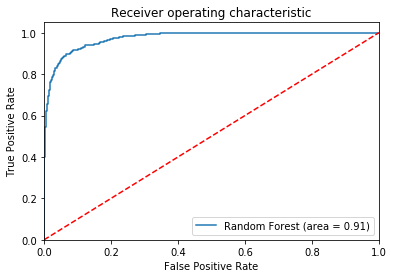

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[1094   35]
 [ 118  360]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.91      0.75      0.82       478

avg / total       0.91      0.90      0.90      1607

ROC CURVE


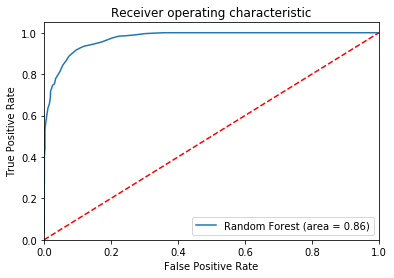

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[1094   35]
 [ 118  360]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.91      0.75      0.82       478

avg / total       0.91      0.90      0.90      1607

ROC CURVE


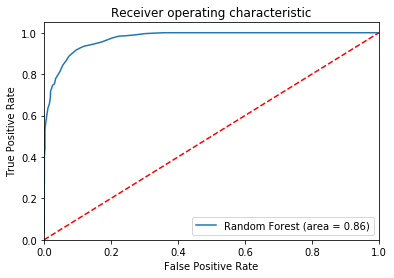

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[1094   35]
 [ 118  360]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.91      0.75      0.82       478

avg / total       0.91      0.90      0.90      1607

ROC CURVE


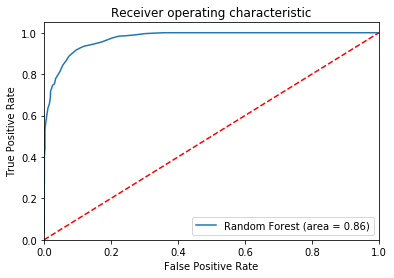

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[1094   35]
 [ 118  360]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.91      0.75      0.82       478

avg / total       0.91      0.90      0.90      1607

ROC CURVE


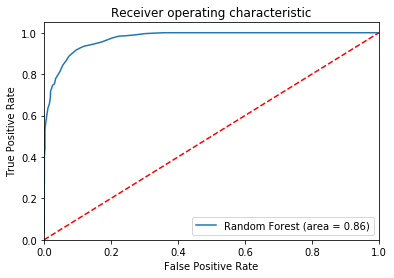

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[971 158]
 [213 265]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.82      0.86      0.84      1129
          1       0.63      0.55      0.59       478

avg / total       0.76      0.77      0.76      1607

ROC CURVE


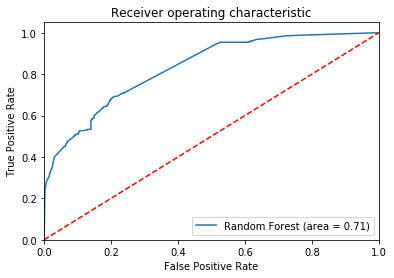

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1064   65]
 [  63  415]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.94      0.94      1129
          1       0.86      0.87      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


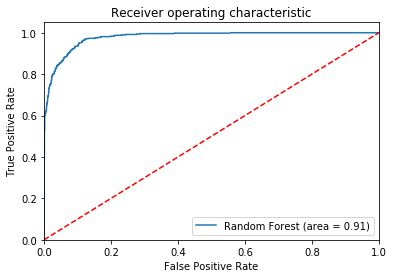

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[1086   43]
 [  73  405]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.85      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


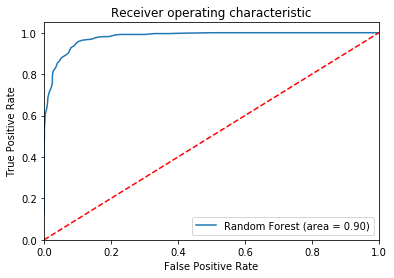

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[1086   43]
 [  73  405]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.85      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


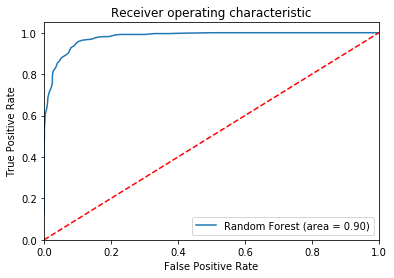

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[1086   43]
 [  73  405]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.85      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


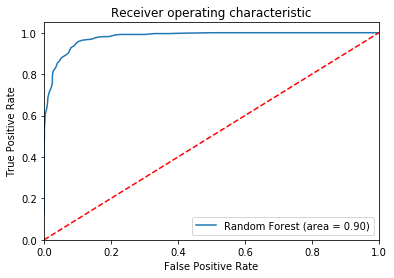

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1086   43]
 [  73  405]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.85      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


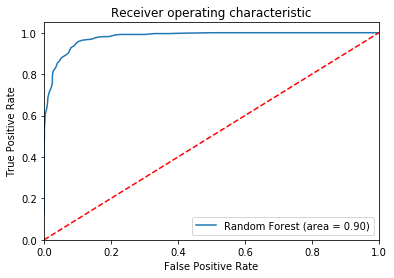

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[971 158]
 [162 316]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.86      0.86      1129
          1       0.67      0.66      0.66       478

avg / total       0.80      0.80      0.80      1607

ROC CURVE


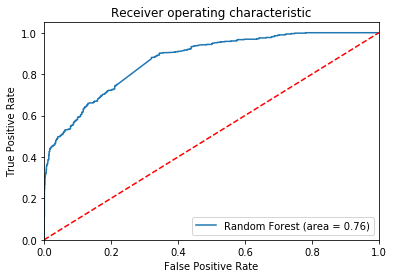

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1080   49]
 [  60  418]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      1129
          1       0.90      0.87      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


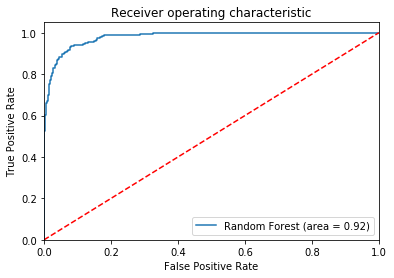

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[1094   35]
 [  96  382]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


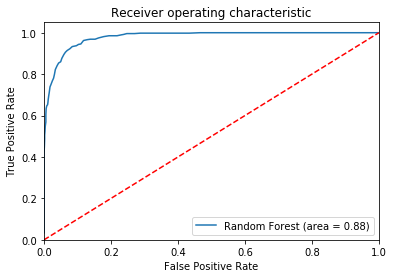

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[1094   35]
 [  96  382]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


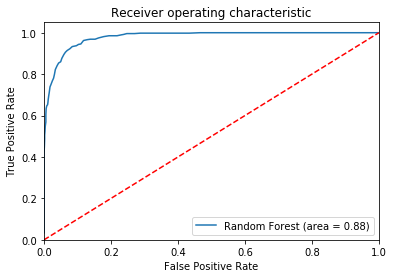

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[1094   35]
 [  96  382]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


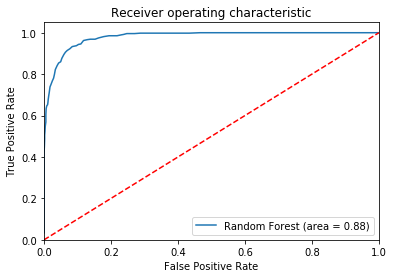

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[1094   35]
 [  96  382]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


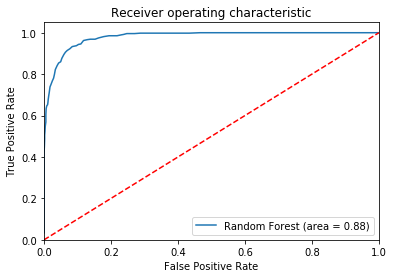

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[971 158]
 [162 316]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.86      0.86      1129
          1       0.67      0.66      0.66       478

avg / total       0.80      0.80      0.80      1607

ROC CURVE


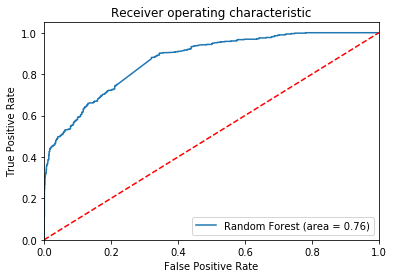

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[1080   49]
 [  60  418]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      1129
          1       0.90      0.87      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


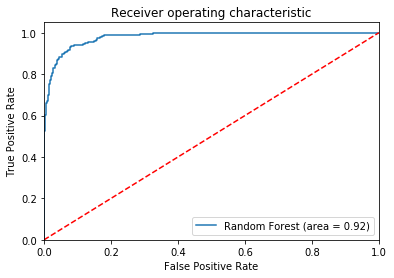

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[1094   35]
 [  96  382]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


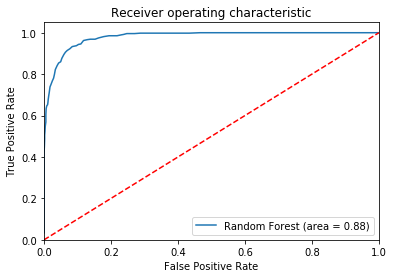

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[1094   35]
 [  96  382]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


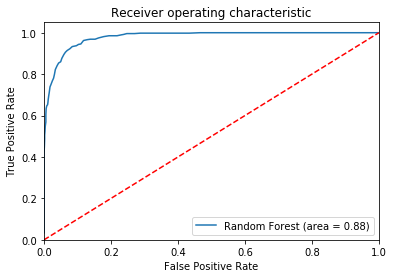

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[1094   35]
 [  96  382]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


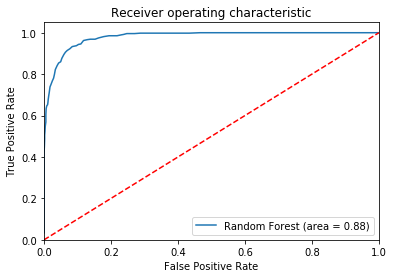

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[1094   35]
 [  96  382]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


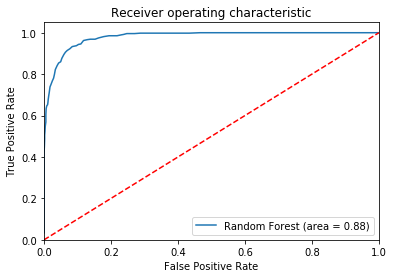

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[963 166]
 [159 319]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.85      0.86      1129
          1       0.66      0.67      0.66       478

avg / total       0.80      0.80      0.80      1607

ROC CURVE


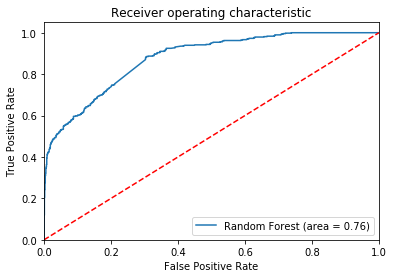

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[1073   56]
 [  55  423]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1129
          1       0.88      0.88      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


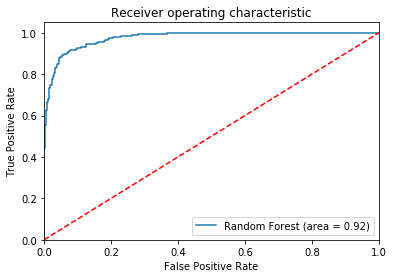

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[1096   33]
 [ 103  375]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.92      0.78      0.85       478

avg / total       0.92      0.92      0.91      1607

ROC CURVE


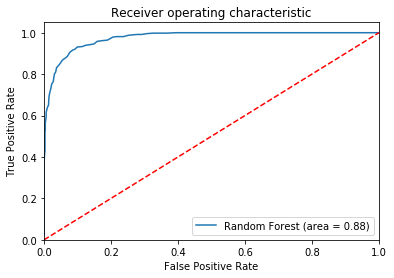

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[1096   33]
 [ 103  375]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.92      0.78      0.85       478

avg / total       0.92      0.92      0.91      1607

ROC CURVE


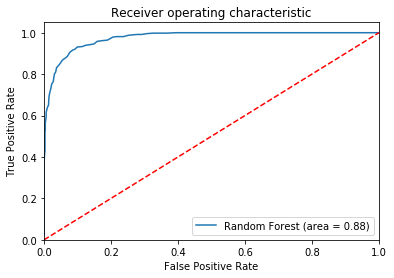

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[1096   33]
 [ 103  375]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.92      0.78      0.85       478

avg / total       0.92      0.92      0.91      1607

ROC CURVE


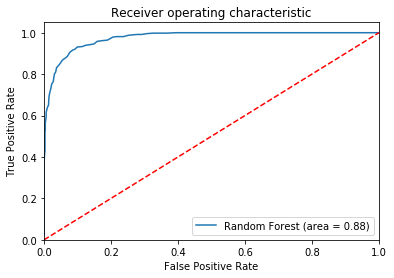

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[1096   33]
 [ 103  375]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.92      0.78      0.85       478

avg / total       0.92      0.92      0.91      1607

ROC CURVE


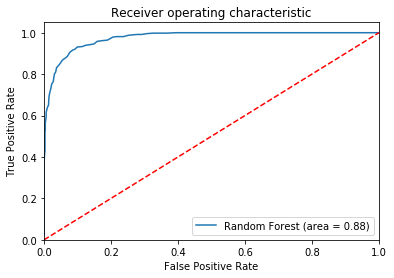

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[969 160]
 [211 267]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.82      0.86      0.84      1129
          1       0.63      0.56      0.59       478

avg / total       0.76      0.77      0.77      1607

ROC CURVE


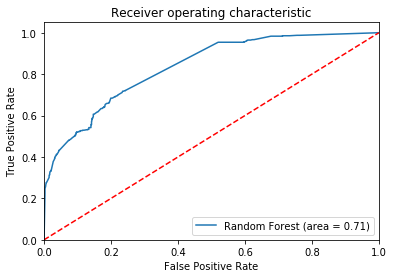

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1071   58]
 [  58  420]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1129
          1       0.88      0.88      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


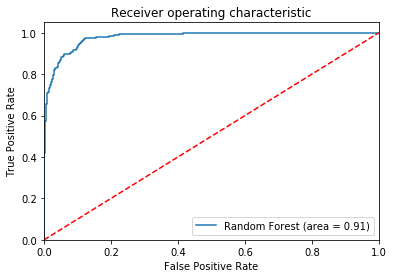

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[1085   44]
 [  73  405]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.85      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


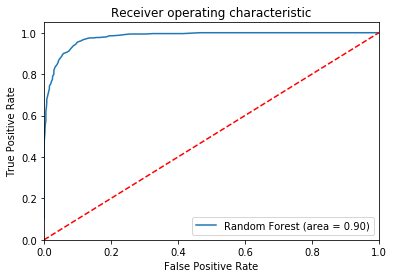

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[1085   44]
 [  73  405]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.85      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


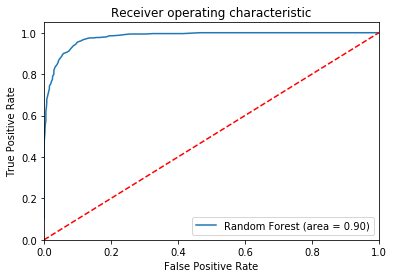

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[1085   44]
 [  73  405]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.85      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


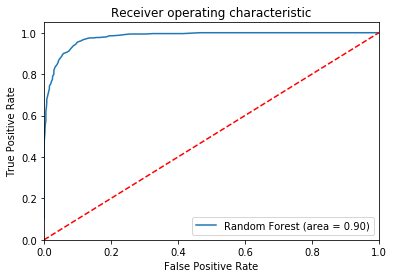

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1085   44]
 [  73  405]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.85      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


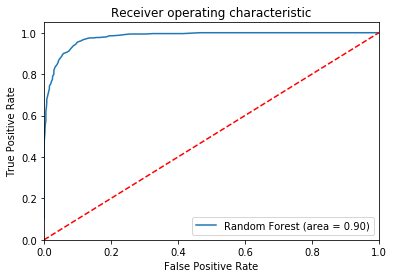

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[967 162]
 [160 318]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.86      0.86      1129
          1       0.66      0.67      0.66       478

avg / total       0.80      0.80      0.80      1607

ROC CURVE


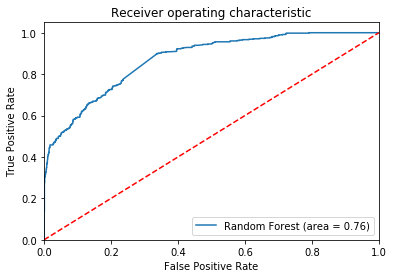

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1076   53]
 [  59  419]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1129
          1       0.89      0.88      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


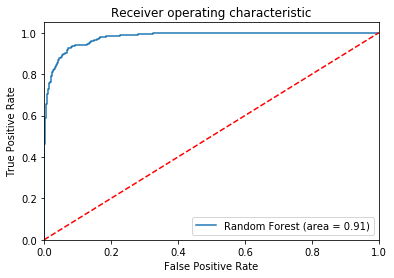

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[1091   38]
 [  91  387]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.91      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


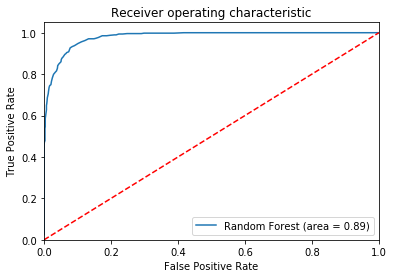

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[1091   38]
 [  91  387]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.91      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


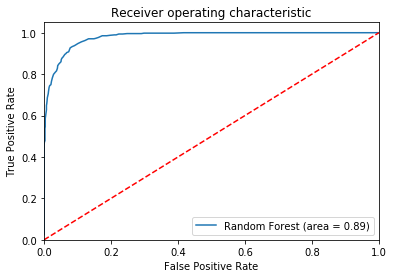

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[1091   38]
 [  91  387]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.91      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


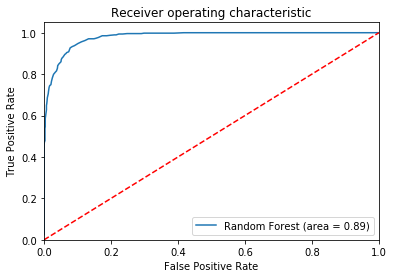

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[1091   38]
 [  91  387]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.91      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


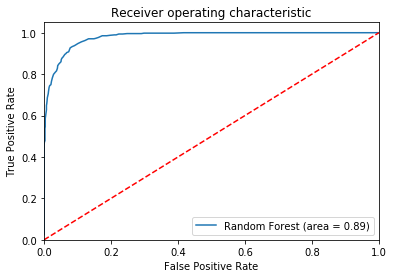

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[967 162]
 [160 318]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.86      0.86      1129
          1       0.66      0.67      0.66       478

avg / total       0.80      0.80      0.80      1607

ROC CURVE


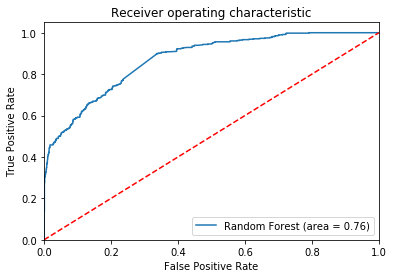

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[1076   53]
 [  59  419]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1129
          1       0.89      0.88      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


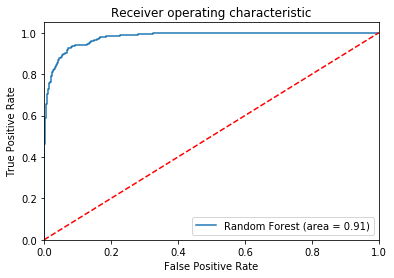

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[1091   38]
 [  91  387]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.91      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


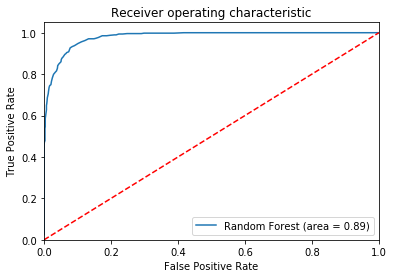

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[1091   38]
 [  91  387]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.91      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


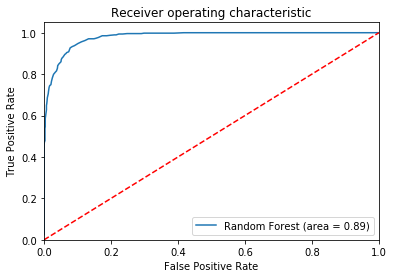

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[1091   38]
 [  91  387]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.91      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


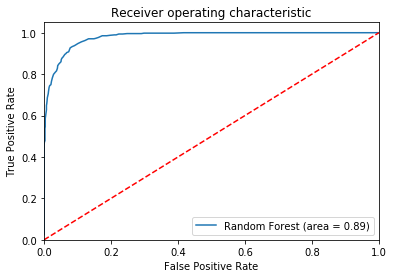

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[1091   38]
 [  91  387]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.91      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


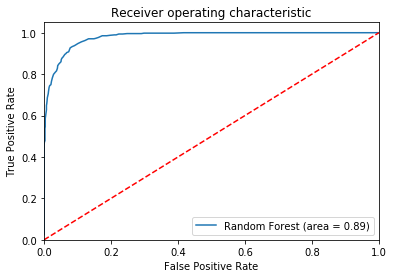

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[963 166]
 [155 323]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.85      0.86      1129
          1       0.66      0.68      0.67       478

avg / total       0.80      0.80      0.80      1607

ROC CURVE


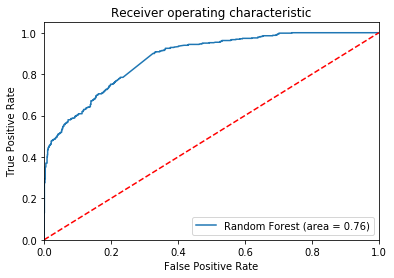

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[1069   60]
 [  57  421]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1129
          1       0.88      0.88      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


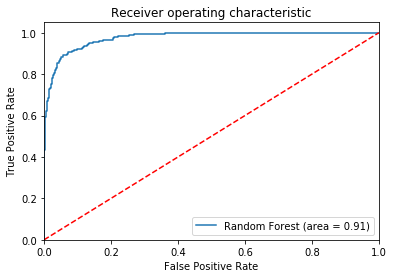

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[1096   33]
 [  99  379]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.79      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


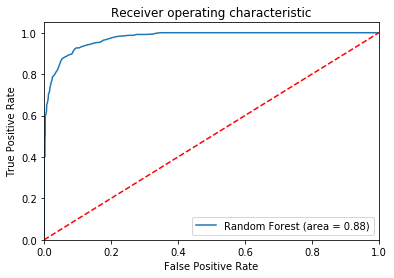

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[1096   33]
 [  99  379]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.79      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


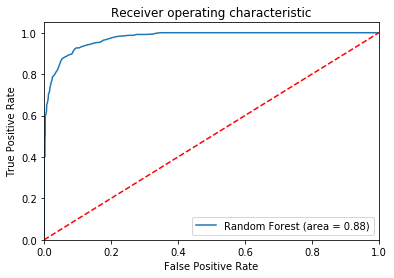

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[1096   33]
 [  99  379]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.79      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


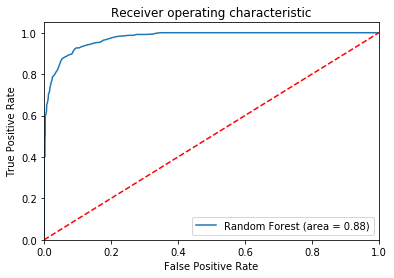

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[1096   33]
 [  99  379]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.79      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


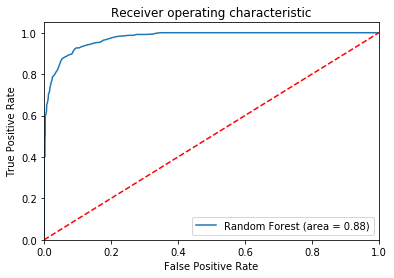

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[968 161]
 [209 269]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.82      0.86      0.84      1129
          1       0.63      0.56      0.59       478

avg / total       0.76      0.77      0.77      1607

ROC CURVE


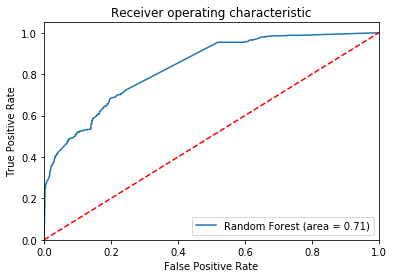

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1069   60]
 [  59  419]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1129
          1       0.87      0.88      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


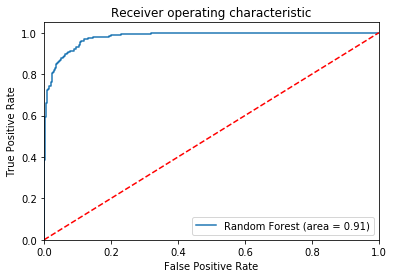

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[1085   44]
 [  71  407]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.85      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


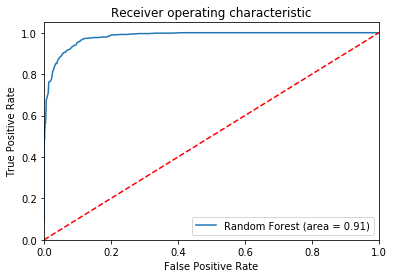

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[1085   44]
 [  71  407]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.85      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


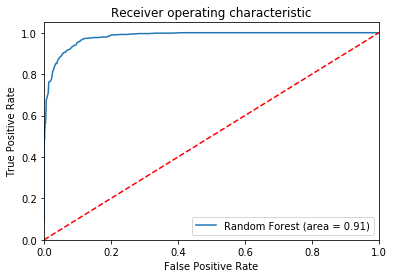

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[1085   44]
 [  71  407]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.85      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


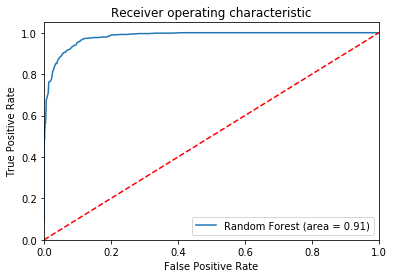

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1085   44]
 [  71  407]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.85      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


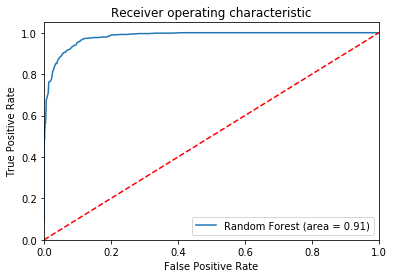

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
Time Elapsed:
163.03938755262652


In [28]:
#Find optimal parameters
start_time = timeit.default_timer()
for i in Estimators:
    for j in maxFeatures:
        for k in maxDepth:
            hyperparameterTuneRandomForest(i,j,k,X_train_selected,y_train,X_validation_selected,y_validation)
elapsed = timeit.default_timer() - start_time
print("Time Elapsed:")
print(elapsed)            

### Random Forest

###### OPTIMAL PARAMETERS
###### Estimators = 100 ----   max features = None   ---------     Max depth = None
###### Execution time (163.094 seconds)


# XGBoost with Cross Validation

In [29]:
#HYPER PARAMETER TUNE
depthMax = [1,2,3,4,5]
learningRate = [0.1,0.05,0.01] 
estimators = [50,100,150,200]

In [30]:
def hyperparameterTuneXGBoost(i,j,k,X_train,y_train,X_test,y_test):

    XGBModel = XGBClassifier(max_depth=i,learning_rate=j, n_estimators=k,random_state=123)
    XGBModel.fit(X_train, y_train)

    y_pred = XGBModel.predict(X_test)

    # evaluate predictions
    print("  Max Depth =" + str(i) + "          Learning Rate =" + str(j) + "         Estimators =" + str(k) )


    print('CONFUSION MATRIX:   ')
    confusion_matrix2 = confusion_matrix(y_test, y_pred)
    print(confusion_matrix2)
    
    print('CLASSIFICATION REPORT:    ')
    print(classification_report(y_test, y_pred))

    print('ROC CURVE')
    logit_roc_auc = roc_auc_score(y_test, XGBModel.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, XGBModel.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    return

  Max Depth =1          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[1105   24]
 [ 239  239]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.82      0.98      0.89      1129
          1       0.91      0.50      0.65       478

avg / total       0.85      0.84      0.82      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


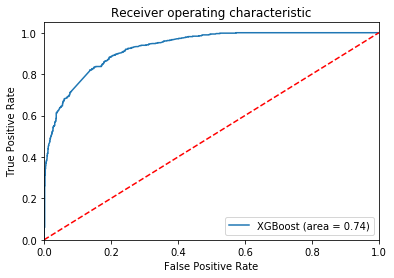

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1094   35]
 [ 181  297]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.97      0.91      1129
          1       0.89      0.62      0.73       478

avg / total       0.87      0.87      0.86      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


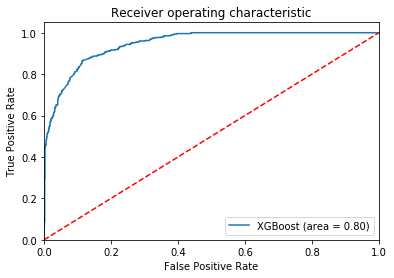

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[1097   32]
 [ 151  327]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.97      0.92      1129
          1       0.91      0.68      0.78       478

avg / total       0.89      0.89      0.88      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


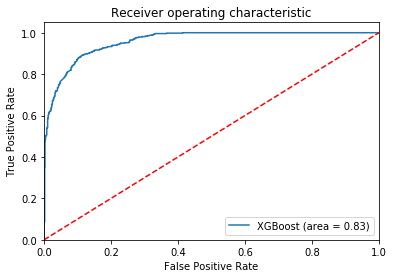

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1101   28]
 [ 124  354]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      1129
          1       0.93      0.74      0.82       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


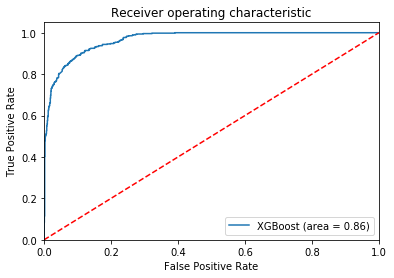

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[1119   10]
 [ 294  184]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.79      0.99      0.88      1129
          1       0.95      0.38      0.55       478

avg / total       0.84      0.81      0.78      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


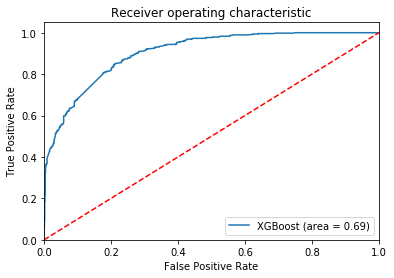

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[1107   22]
 [ 239  239]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.82      0.98      0.89      1129
          1       0.92      0.50      0.65       478

avg / total       0.85      0.84      0.82      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


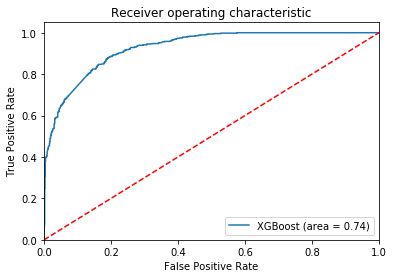

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[1098   31]
 [ 208  270]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.84      0.97      0.90      1129
          1       0.90      0.56      0.69       478

avg / total       0.86      0.85      0.84      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


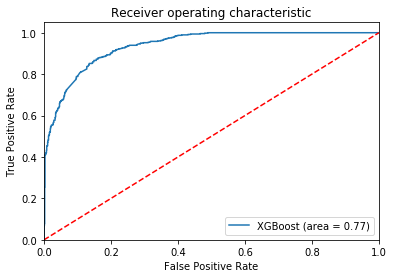

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[1097   32]
 [ 184  294]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.97      0.91      1129
          1       0.90      0.62      0.73       478

avg / total       0.87      0.87      0.86      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


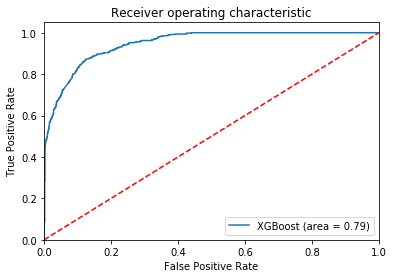

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[1082   47]
 [ 293  185]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.79      0.96      0.86      1129
          1       0.80      0.39      0.52       478

avg / total       0.79      0.79      0.76      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


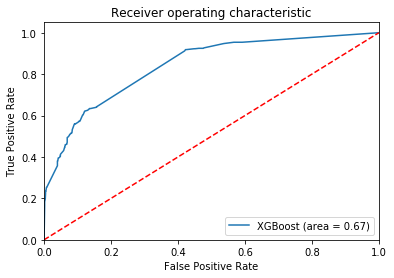

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[1118   11]
 [ 333  145]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.77      0.99      0.87      1129
          1       0.93      0.30      0.46       478

avg / total       0.82      0.79      0.74      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


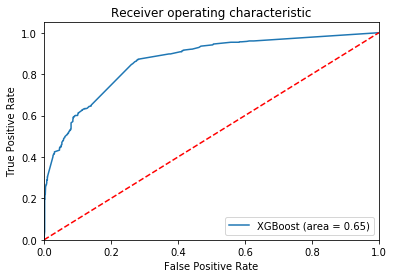

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[1120    9]
 [ 303  175]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.79      0.99      0.88      1129
          1       0.95      0.37      0.53       478

avg / total       0.84      0.81      0.77      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


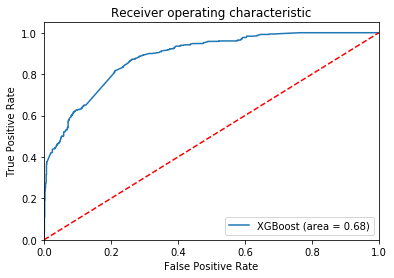

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[1118   11]
 [ 298  180]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.79      0.99      0.88      1129
          1       0.94      0.38      0.54       478

avg / total       0.84      0.81      0.78      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


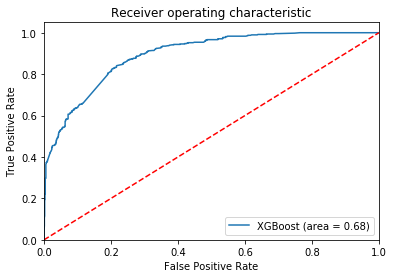

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[1074   55]
 [ 113  365]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.95      0.93      1129
          1       0.87      0.76      0.81       478

avg / total       0.89      0.90      0.89      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


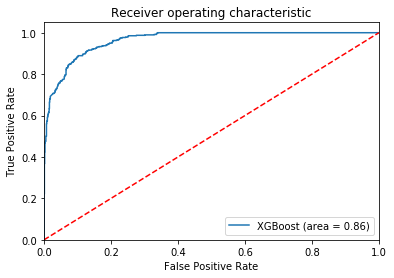

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1094   35]
 [  87  391]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.92      0.82      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


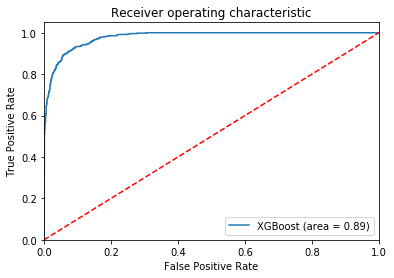

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[1091   38]
 [  69  409]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1129
          1       0.91      0.86      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


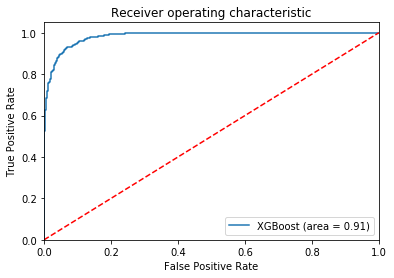

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1091   38]
 [  68  410]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1129
          1       0.92      0.86      0.89       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


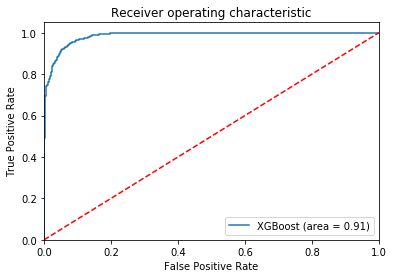

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[1065   64]
 [ 153  325]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      0.94      0.91      1129
          1       0.84      0.68      0.75       478

avg / total       0.86      0.86      0.86      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


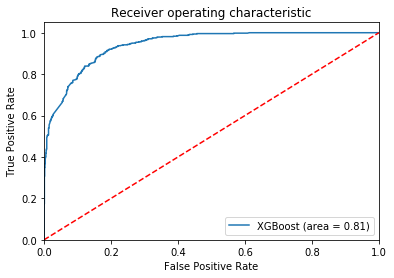

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[1070   59]
 [ 109  369]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.95      0.93      1129
          1       0.86      0.77      0.81       478

avg / total       0.89      0.90      0.89      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


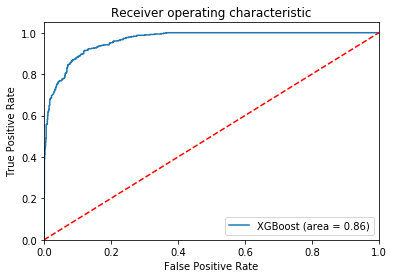

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[1090   39]
 [  92  386]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.91      0.81      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


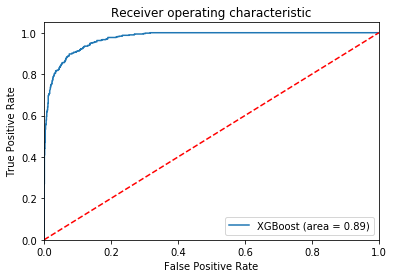

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[1093   36]
 [  86  392]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.92      0.82      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


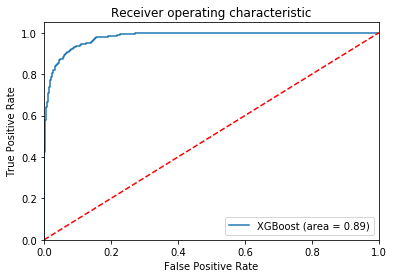

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[1090   39]
 [ 245  233]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.82      0.97      0.88      1129
          1       0.86      0.49      0.62       478

avg / total       0.83      0.82      0.81      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


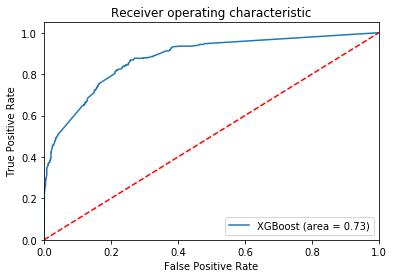

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[1099   30]
 [ 222  256]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.83      0.97      0.90      1129
          1       0.90      0.54      0.67       478

avg / total       0.85      0.84      0.83      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


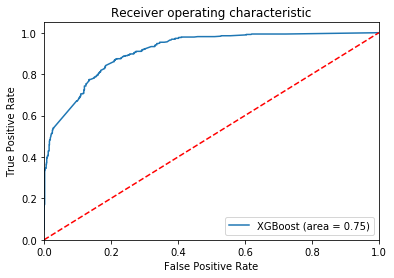

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[1099   30]
 [ 202  276]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.84      0.97      0.90      1129
          1       0.90      0.58      0.70       478

avg / total       0.86      0.86      0.84      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


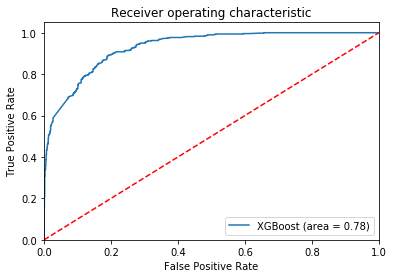

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[1058   71]
 [ 154  324]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      0.94      0.90      1129
          1       0.82      0.68      0.74       478

avg / total       0.86      0.86      0.86      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


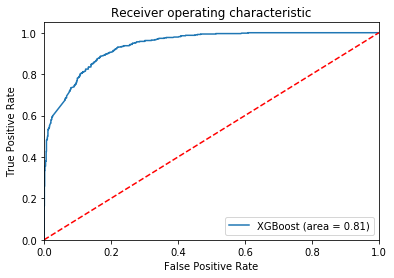

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[1086   43]
 [  83  395]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1129
          1       0.90      0.83      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


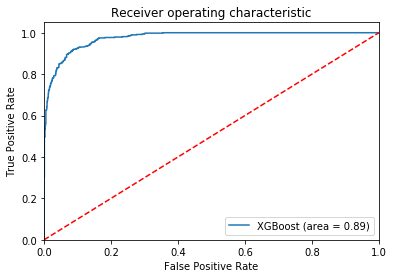

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1087   42]
 [  69  409]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.91      0.86      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


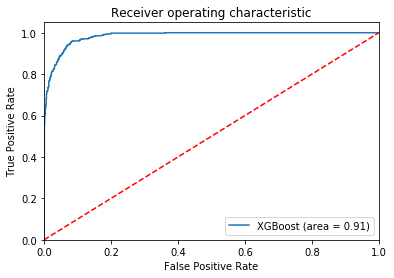

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[1086   43]
 [  59  419]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.96      1129
          1       0.91      0.88      0.89       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


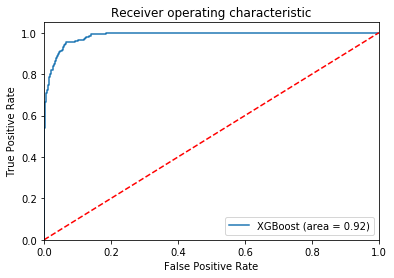

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1091   38]
 [  54  424]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1129
          1       0.92      0.89      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


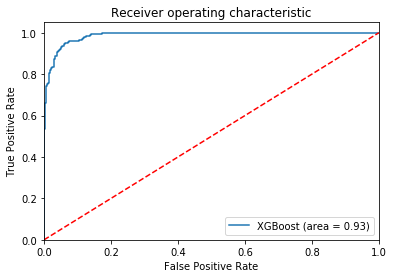

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[1087   42]
 [ 103  375]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.96      0.94      1129
          1       0.90      0.78      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


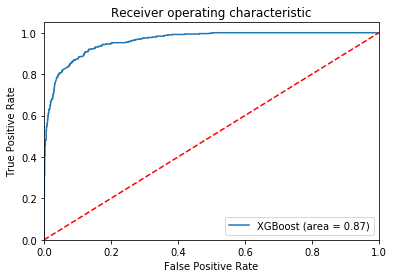

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[1086   43]
 [  79  399]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1129
          1       0.90      0.83      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


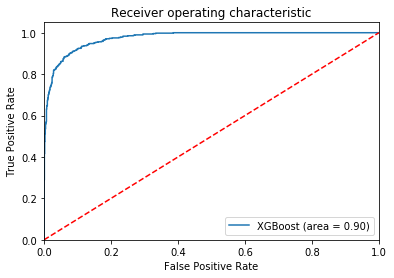

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[1086   43]
 [  70  408]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.85      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


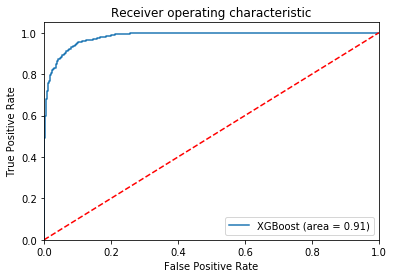

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[1084   45]
 [  67  411]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.86      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


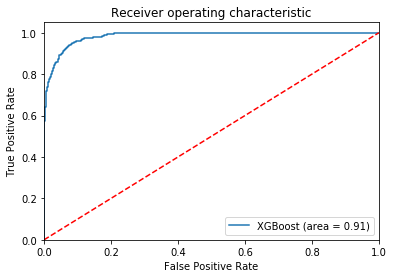

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[1082   47]
 [ 187  291]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.96      0.90      1129
          1       0.86      0.61      0.71       478

avg / total       0.86      0.85      0.85      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


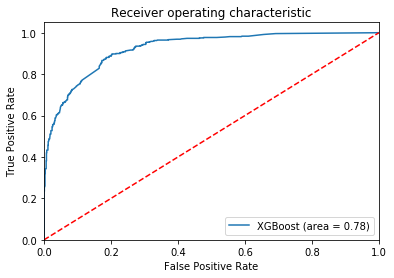

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[1087   42]
 [ 153  325]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.96      0.92      1129
          1       0.89      0.68      0.77       478

avg / total       0.88      0.88      0.87      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


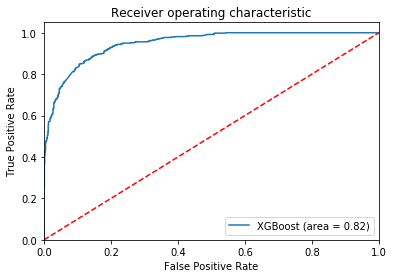

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[1093   36]
 [ 128  350]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.91      0.73      0.81       478

avg / total       0.90      0.90      0.89      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


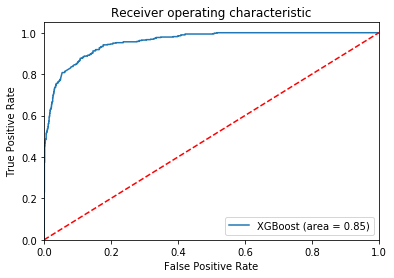

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[1094   35]
 [ 119  359]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.91      0.75      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


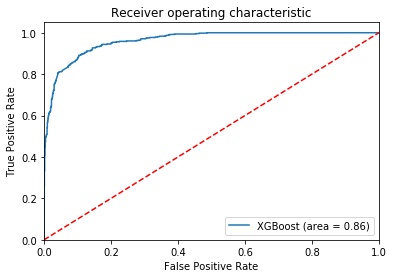

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[1092   37]
 [  79  399]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.92      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


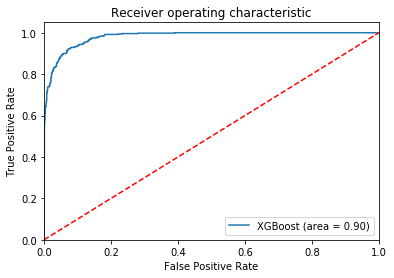

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1087   42]
 [  63  415]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      1129
          1       0.91      0.87      0.89       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


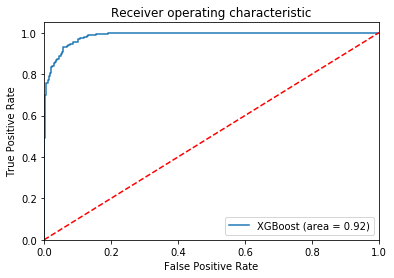

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[1089   40]
 [  59  419]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.96      1129
          1       0.91      0.88      0.89       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


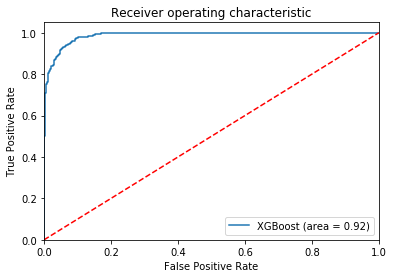

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1091   38]
 [  58  420]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1129
          1       0.92      0.88      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


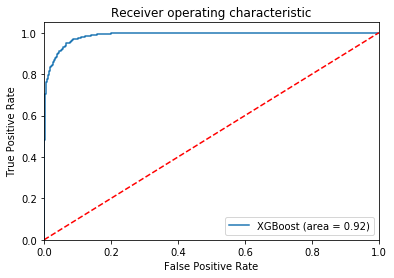

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[1080   49]
 [  92  386]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.89      0.81      0.85       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


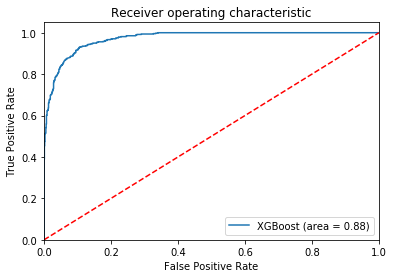

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[1090   39]
 [  76  402]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.91      0.84      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


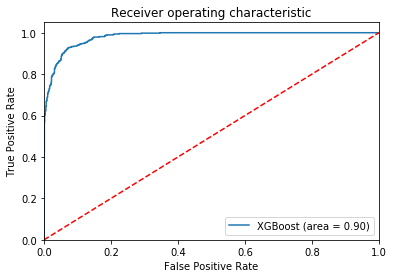

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[1085   44]
 [  66  412]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.86      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


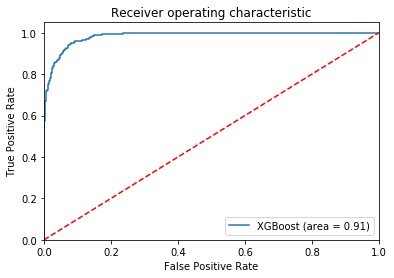

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[1087   42]
 [  62  416]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      1129
          1       0.91      0.87      0.89       478

avg / total       0.93      0.94      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


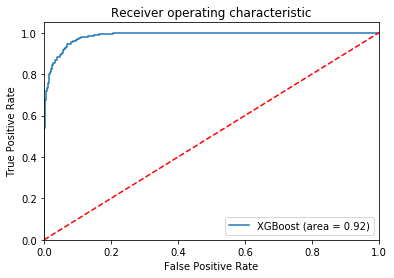

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[1057   72]
 [ 130  348]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.94      0.91      1129
          1       0.83      0.73      0.78       478

avg / total       0.87      0.87      0.87      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


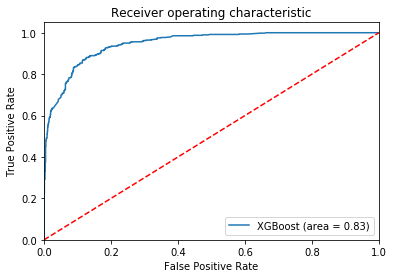

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[1064   65]
 [ 105  373]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.94      0.93      1129
          1       0.85      0.78      0.81       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


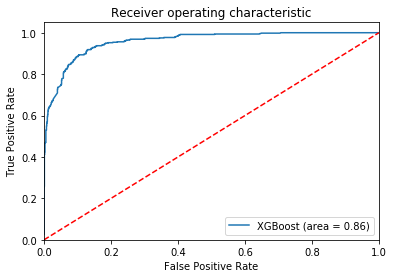

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[1082   47]
 [  95  383]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.89      0.80      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


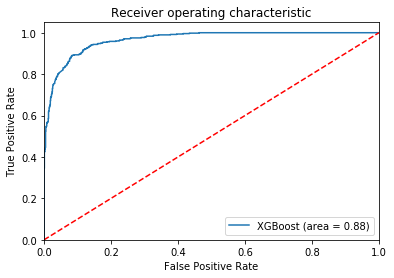

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[1084   45]
 [  93  385]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.90      0.81      0.85       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


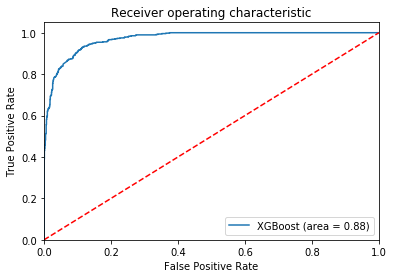

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[1088   41]
 [  66  412]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.91      0.86      0.89       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


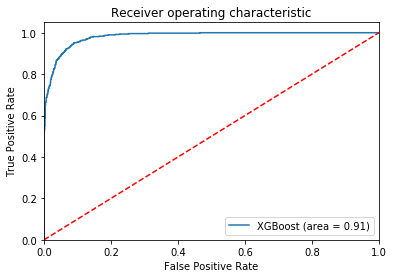

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1090   39]
 [  58  420]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1129
          1       0.92      0.88      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


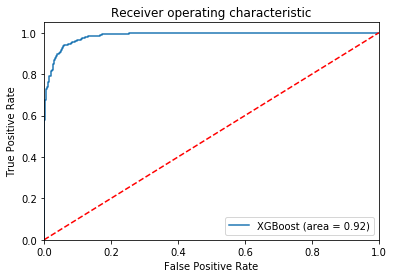

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[1091   38]
 [  58  420]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1129
          1       0.92      0.88      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


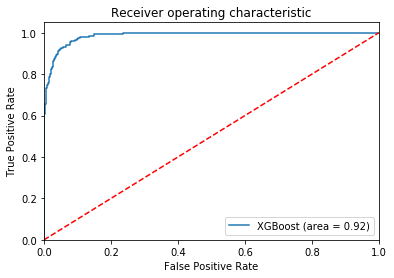

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1092   37]
 [  57  421]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1129
          1       0.92      0.88      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


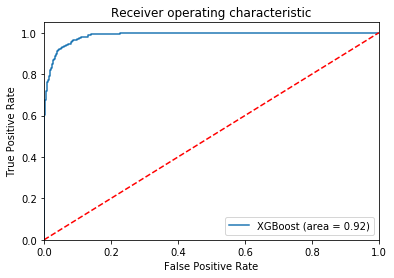

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[1082   47]
 [  74  404]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.85      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


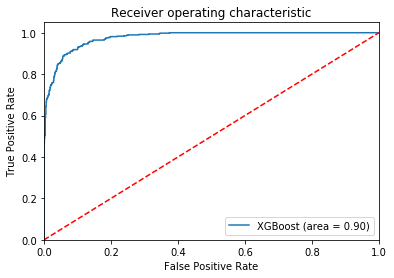

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[1085   44]
 [  71  407]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.85      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


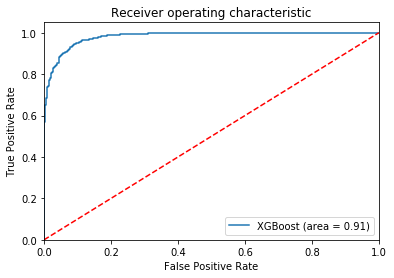

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[1089   40]
 [  62  416]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.96      1129
          1       0.91      0.87      0.89       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


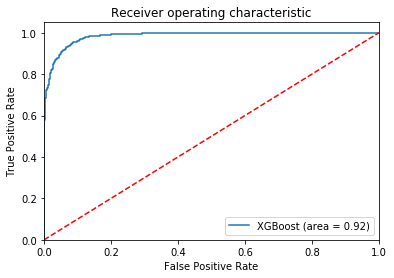

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[1087   42]
 [  59  419]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.96      1129
          1       0.91      0.88      0.89       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


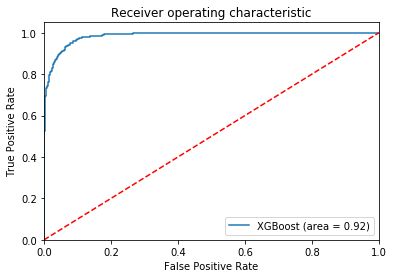

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[1069   60]
 [  99  379]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.95      0.93      1129
          1       0.86      0.79      0.83       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


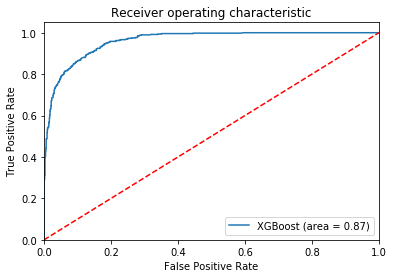

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[1076   53]
 [  97  381]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.95      0.93      1129
          1       0.88      0.80      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


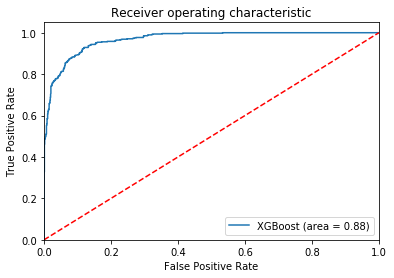

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[1077   52]
 [  86  392]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      1129
          1       0.88      0.82      0.85       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


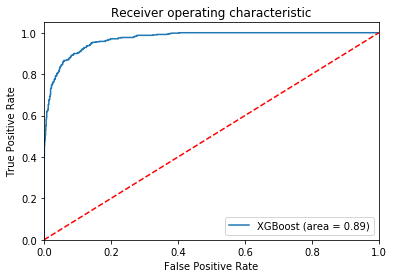

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[1077   52]
 [  81  397]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      1129
          1       0.88      0.83      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


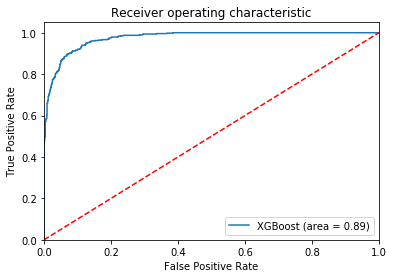

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
Time Elapsed:
80.36768175766338


In [31]:
start_time = timeit.default_timer()
for i in depthMax:
    for j in learningRate:
        for k in estimators:
            hyperparameterTuneXGBoost(i,j,k,X_train_selected,y_train,X_validation_selected,y_validation)
elapsed = timeit.default_timer() - start_time
print("Time Elapsed:")
print(elapsed)  

### XGBOOST

###### OPTIMAL PARAMETERS
###### #Max Depth =3 --------     Learning Rate =0.1    ----------     Estimators =200
###### Execution time 80.368 seconds)


# Test on Unseen Data with optimal hyperparameters

## Logistic Regression

        C =0.001          Maximum Iterations =300
CONFUSION MATRIX:   
[[1046   50]
 [  26  485]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1096
          1       0.91      0.95      0.93       511

avg / total       0.95      0.95      0.95      1607

ROC CURVE


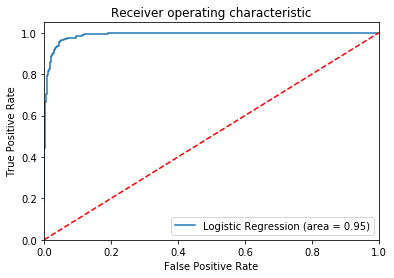

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------


In [32]:
hyperparameterTuneLogistic(0.001,300,X_train_selected,y_train,X_test_selected,y_test)

## Random Forest

  Estimators =100          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1039   57]
 [  76  435]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      1096
          1       0.88      0.85      0.87       511

avg / total       0.92      0.92      0.92      1607

ROC CURVE


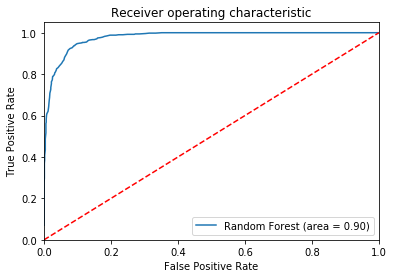

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------


In [33]:
hyperparameterTuneRandomForest(100,None,None,X_train_selected,y_train,X_test_selected,y_test)

## XGBoost

  Max Depth =3          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1045   51]
 [  56  455]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1096
          1       0.90      0.89      0.89       511

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


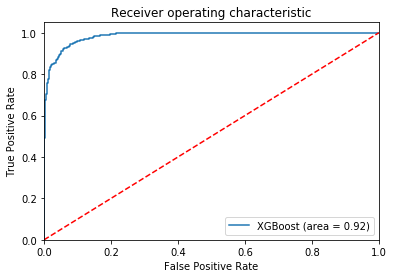

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------


In [34]:
hyperparameterTuneXGBoost(3,0.1,200,X_train_selected,y_train,X_test_selected,y_test)